MAD Graphs for Patient 9

In [176]:
# Import Modules
import sys
sys.path.insert(0, r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\Modules')
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import Actigraph_Metrics

5 Min Double-Sided Window

In [177]:
# Load 5 Min 1-Sided Window Data
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')

filename = 'Patient9_5MIN_DSW_AllSBS.mat'
x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]
print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
59899


In [178]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

print(signal)

[0.002678394729600706, 0.002353349237861233, 0.0023135532535332737, 0.0026931428545784275, 0.0026921841563134243, 0.0023208901081618214, 0.0029396266156411733, 0.002563033042764089, 0.0023028793473659805, 0.002193620719553777, 0.0026330406324687238, 0.002623384702242986, 0.002128368540722576, 0.002328767191489234, 0.002321956153624667, 0.002625854887438632, 0.0026657755157903406, 0.002393917185667398, 0.0025579773590712397, 0.0026753967214059073, 0.002720506550870192, 0.0024608252997431832, 0.0024507427260682603, 0.002338097143361233, 0.00218603245297335, 0.0023225634944079986, 0.002508293328963678, 0.0025517726819804043, 0.0024901805956795008, 0.0023920325491555315, 0.00258045030475019, 0.002070131446643335, 0.0026159710935819568, 0.002356536705307677, 0.0031358765334462803, 0.002260614087514292, 0.0024131416818455364, 0.0025365717457936387, 0.0022415522338821423, 0.002840991124799781, 0.002317150370692385, 0.002097211294084145, 0.0021626665789388475, 0.002345826876511703, 0.002764054

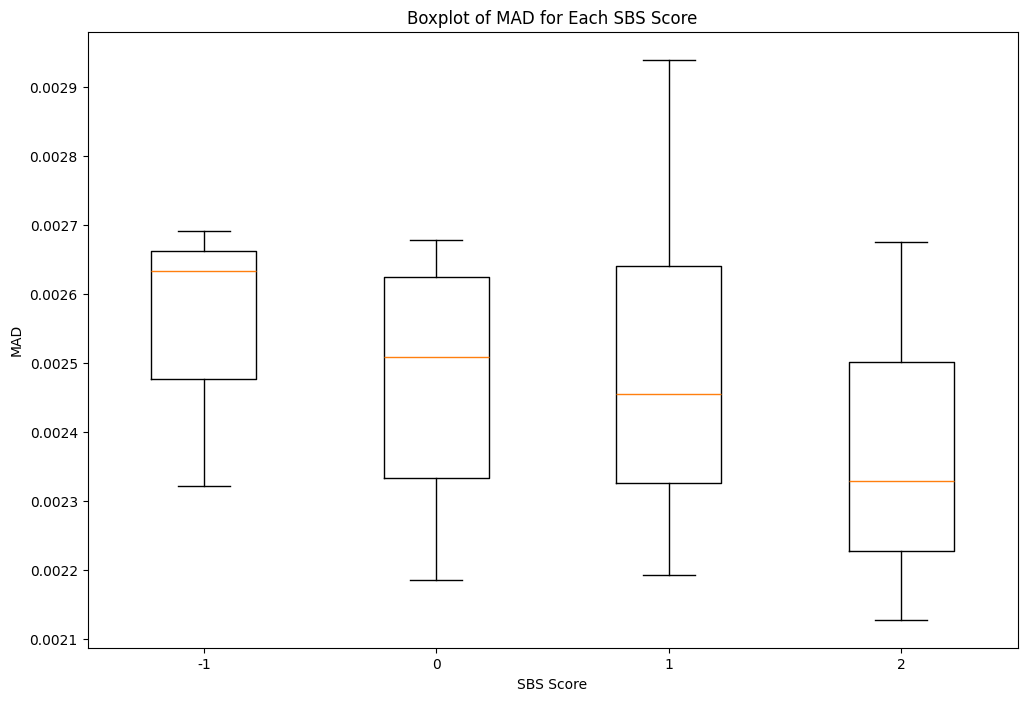

SBS Score: -1
Q1: 0.0024774983930466953
Q2 (Median): 0.0026330406324687238
Q3: 0.002662612394391074
90th Percentile: 0.0026803554515444842

SBS Score: 0
Q1: 0.0023336442365668045
Q2 (Median): 0.002508650943955192
Q3: 0.0026252373411397205
90th Percentile: 0.0026521248085196692

SBS Score: 1
Q1: 0.0023264469066463073
Q2 (Median): 0.0024557840129057215
Q3: 0.0026400898975337777
90th Percentile: 0.0027122974419826625

SBS Score: 2
Q1: 0.0022285678661059048
Q2 (Median): 0.002328767191489234
Q3: 0.0025020819564475706
90th Percentile: 0.0026060708154225726



In [179]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

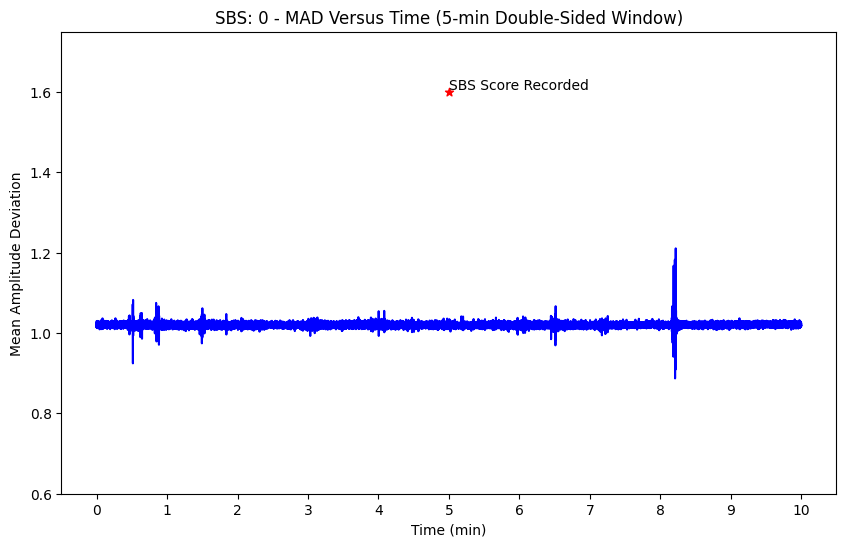

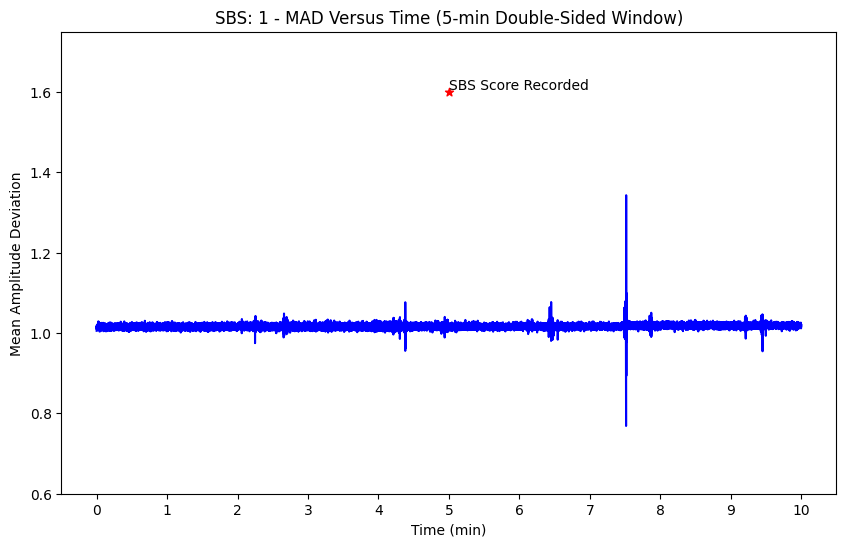

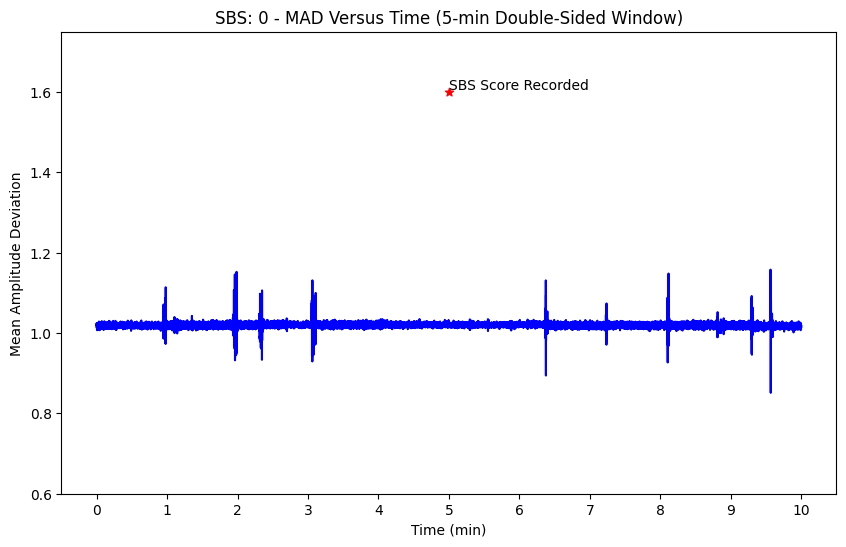

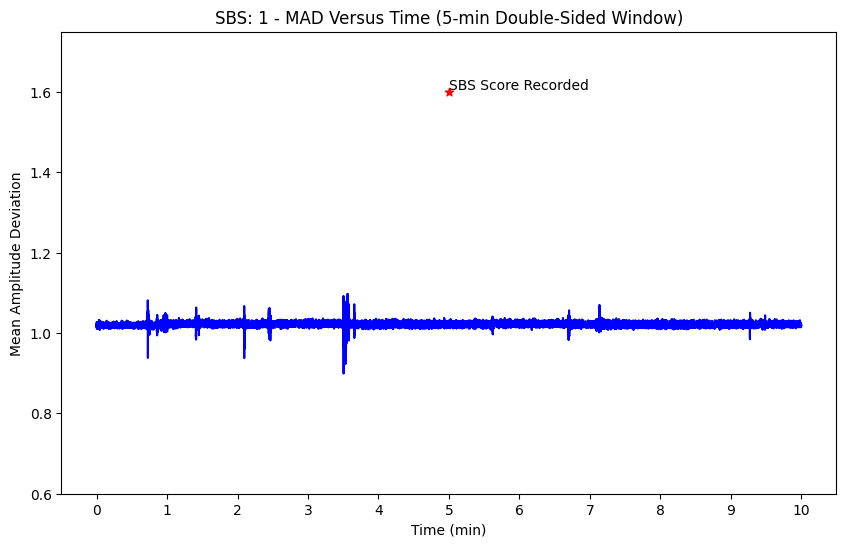

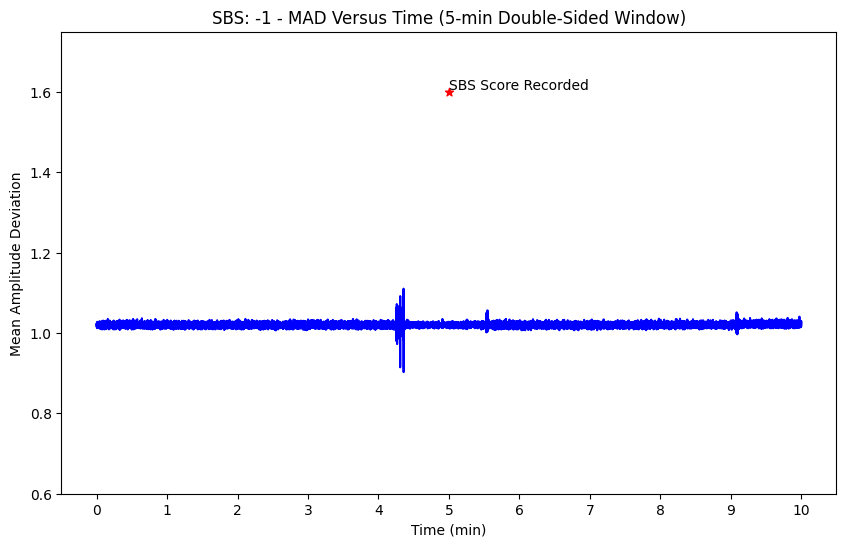

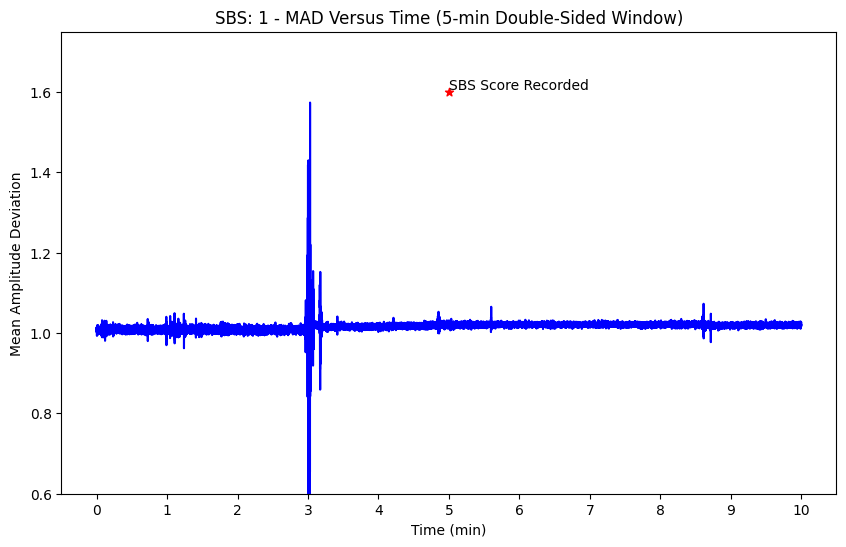

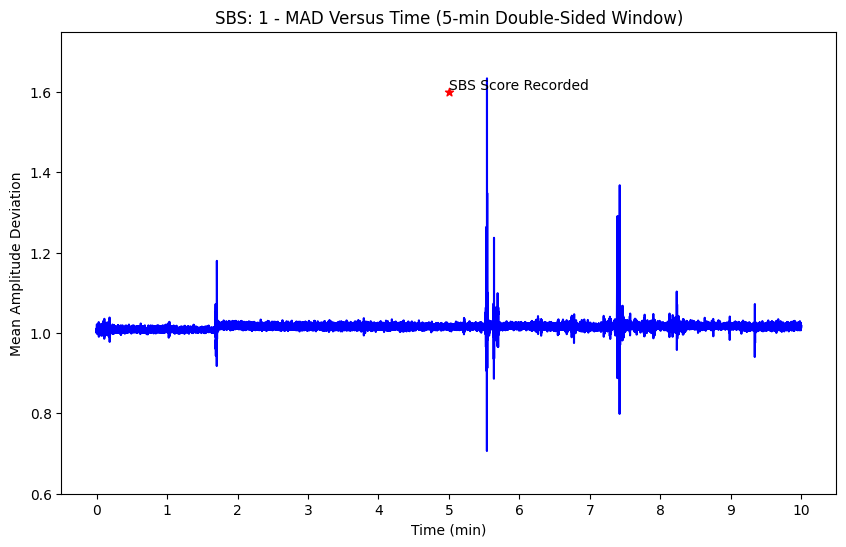

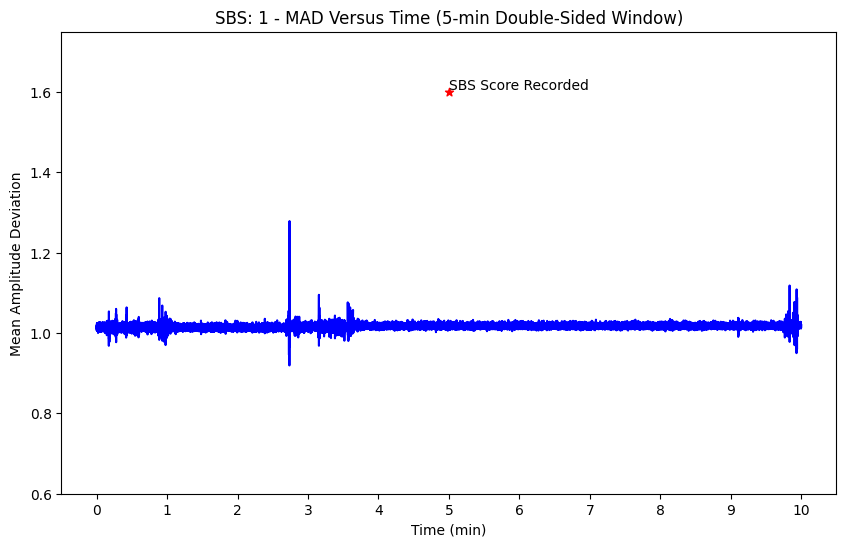

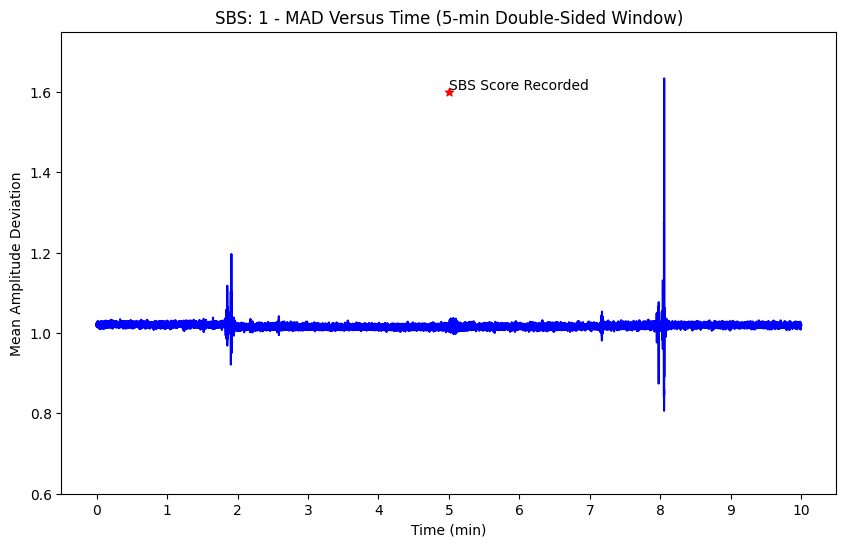

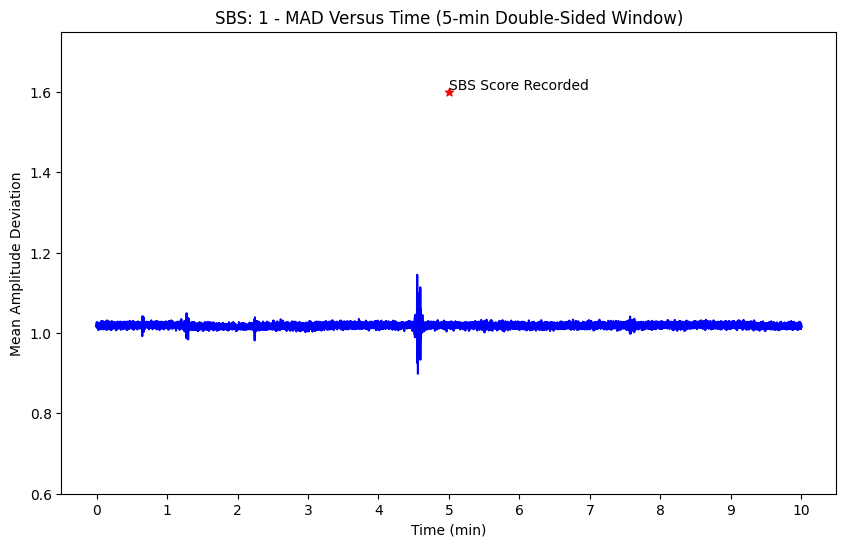

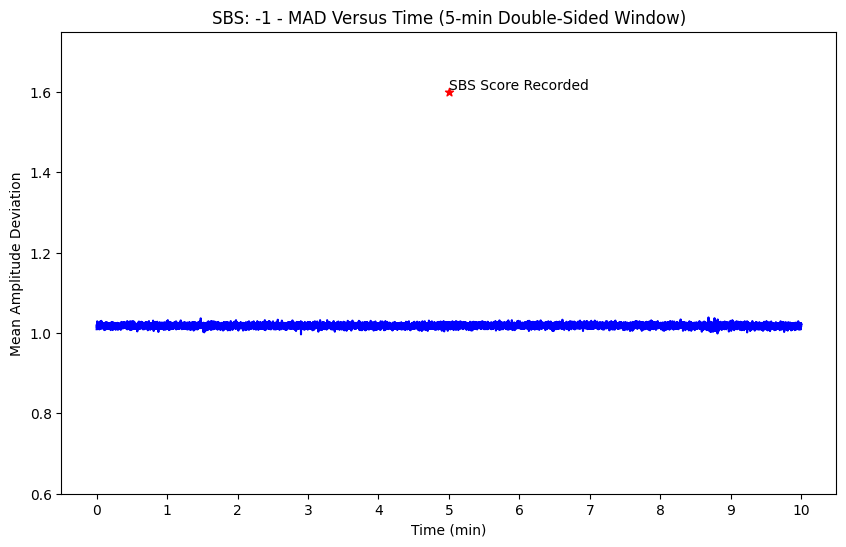

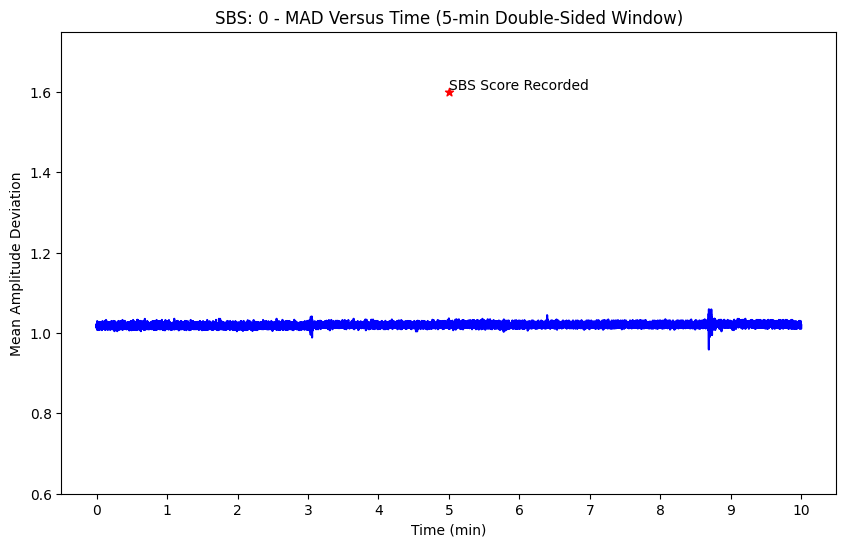

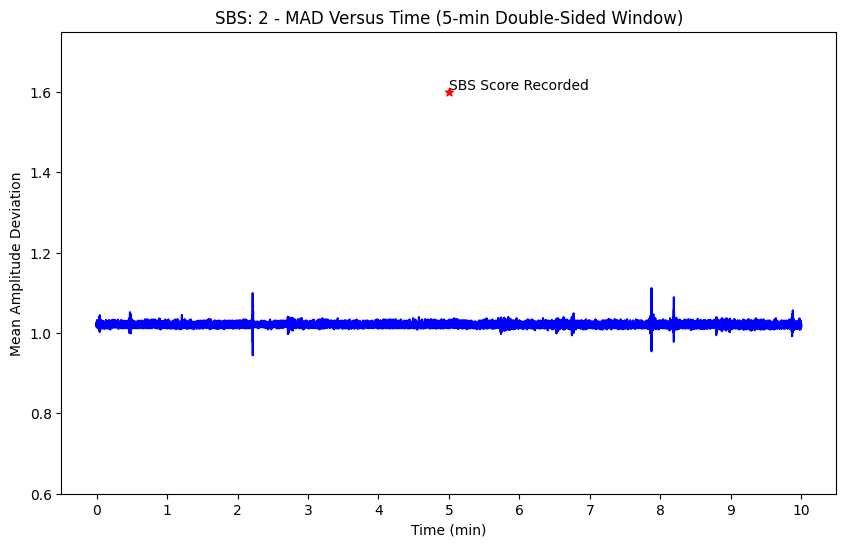

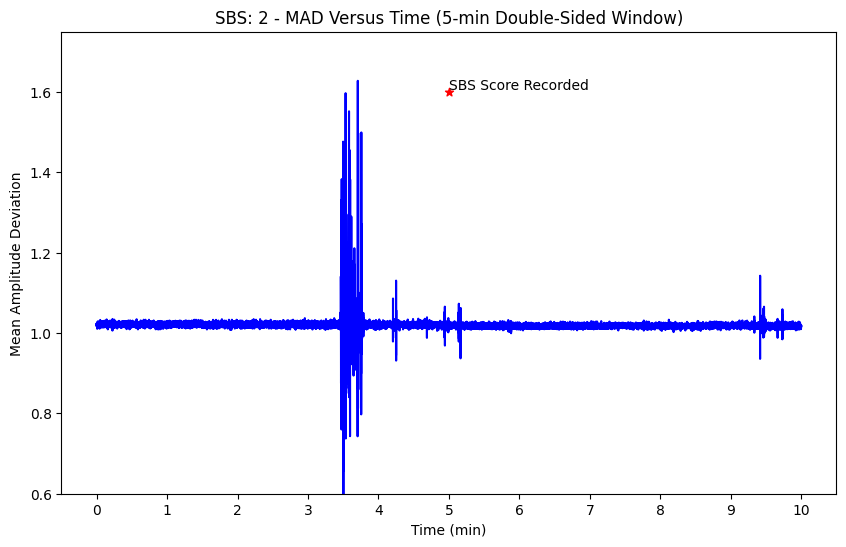

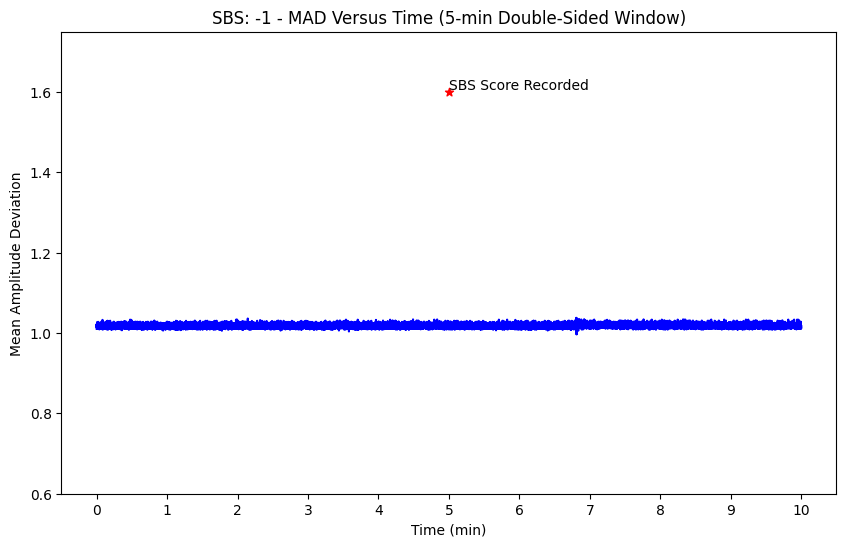

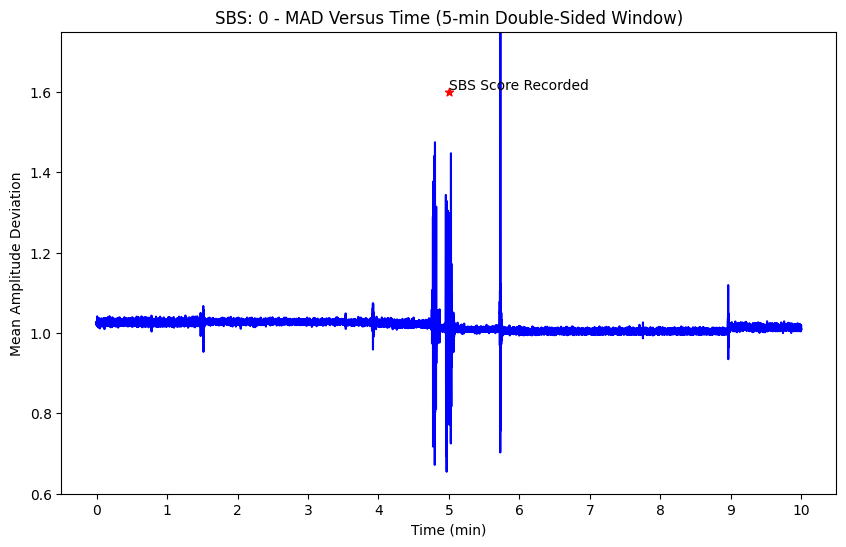

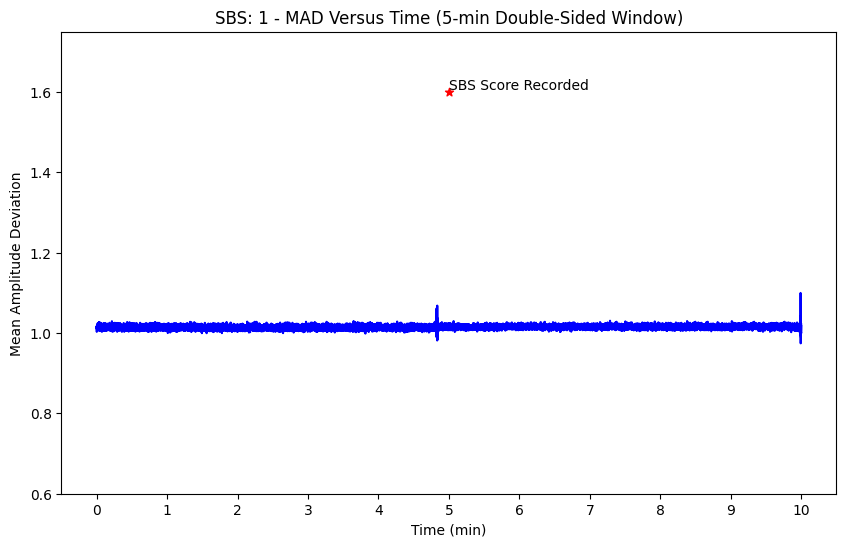

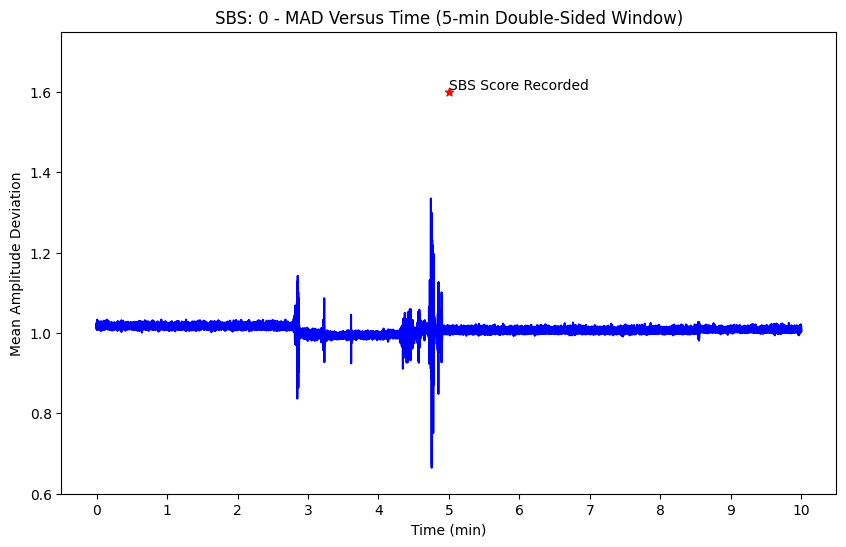

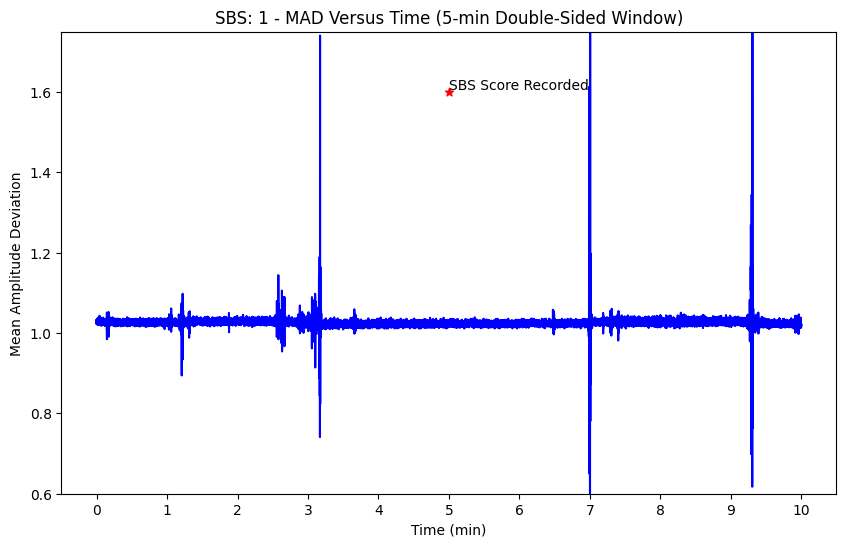

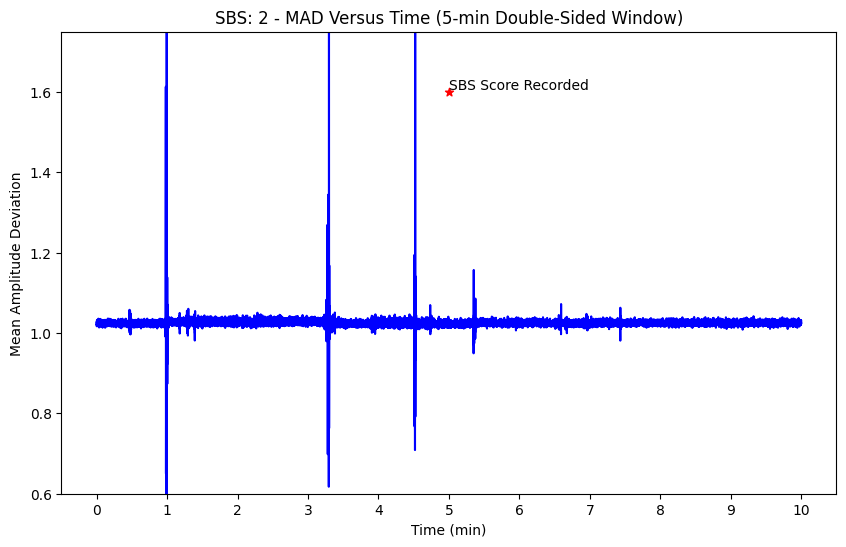

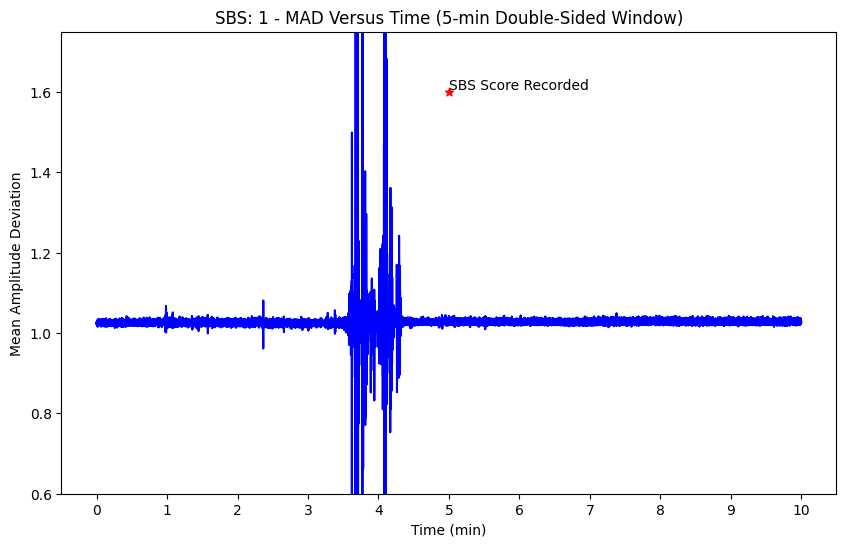

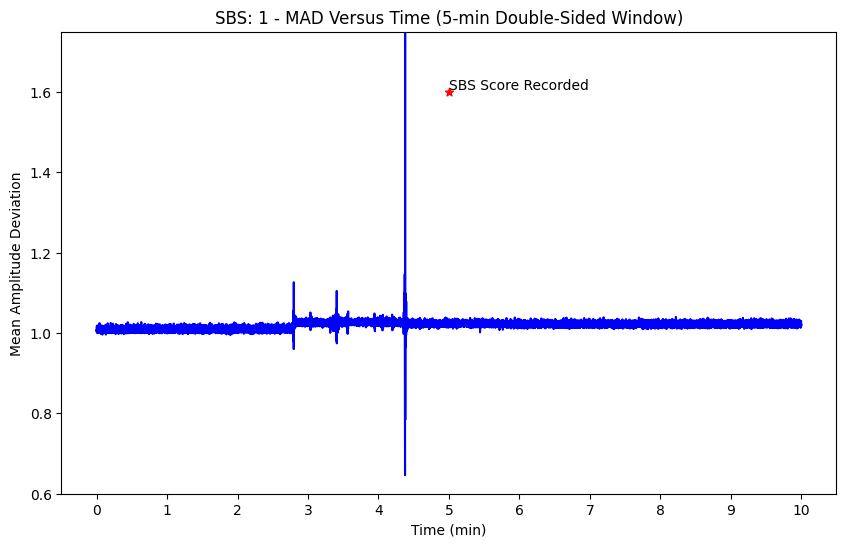

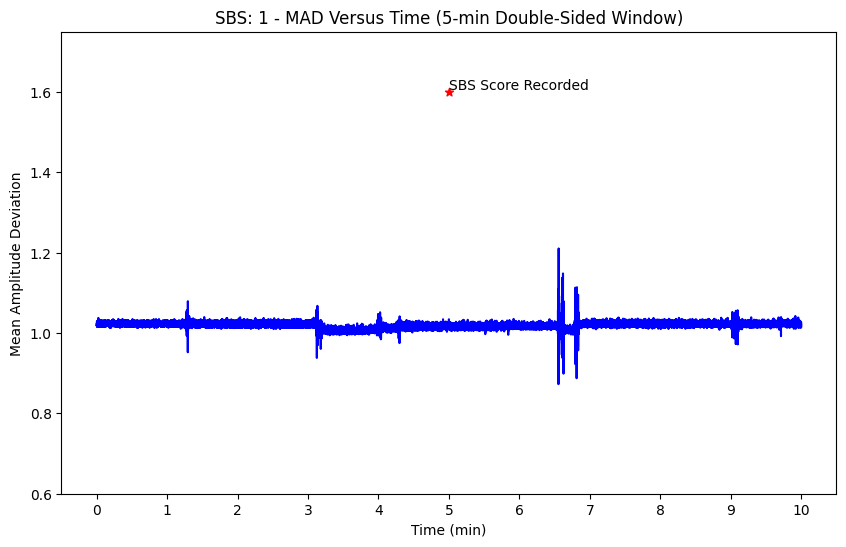

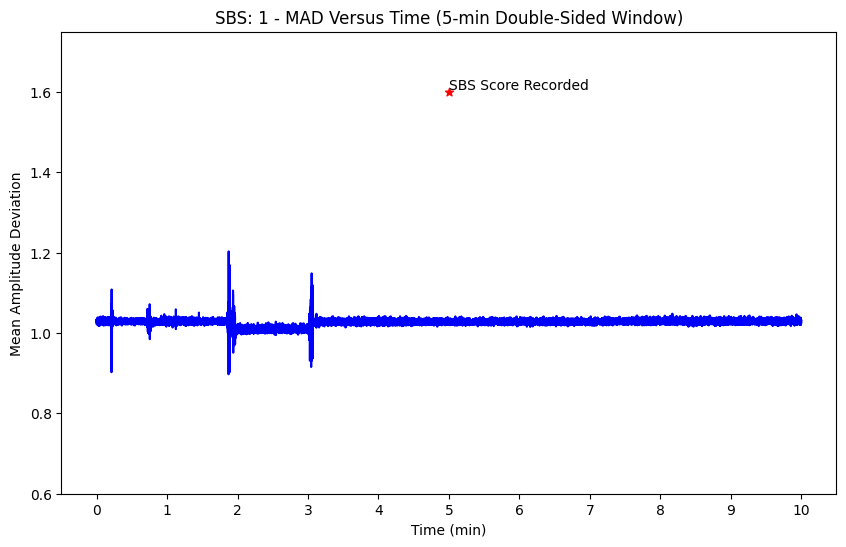

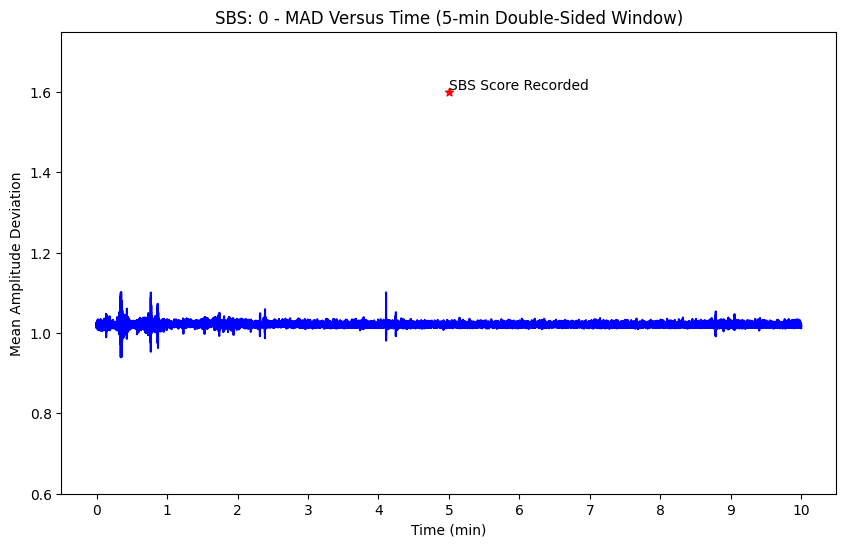

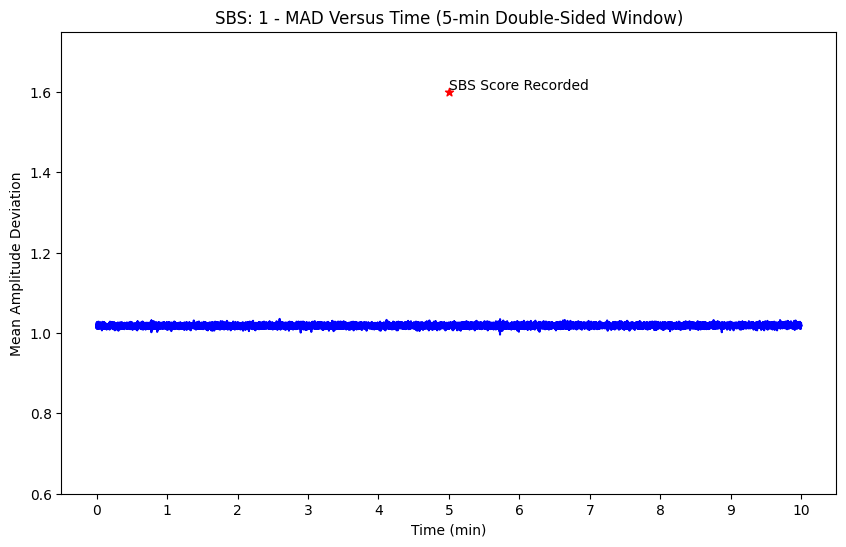

In [180]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 59899, num=59899)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 59899, num=11), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')
    
    plt.scatter(5 * 5989.9, 1.6, color='red', marker='*')
    plt.text(5 * 5989.9, 1.6, "SBS Score Recorded", fontsize=10, verticalalignment='bottom')

    
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (5-min Double-Sided Window)')

    # current_fig = plt.gcf()

    # Display the plot
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\AnalysisResults\Patient9_5MIN_DSW'
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    
    plt.show()
    
    count += 1

10 Minute - 5 Minute Double-Sided Window

In [181]:
# Load 10-Min, 5-MIN Double-Sided Window Data
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')
filename = 'Patient9_10MIN_5MIN_DSW_AllSBS.mat'
x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]
print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
89899


In [182]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

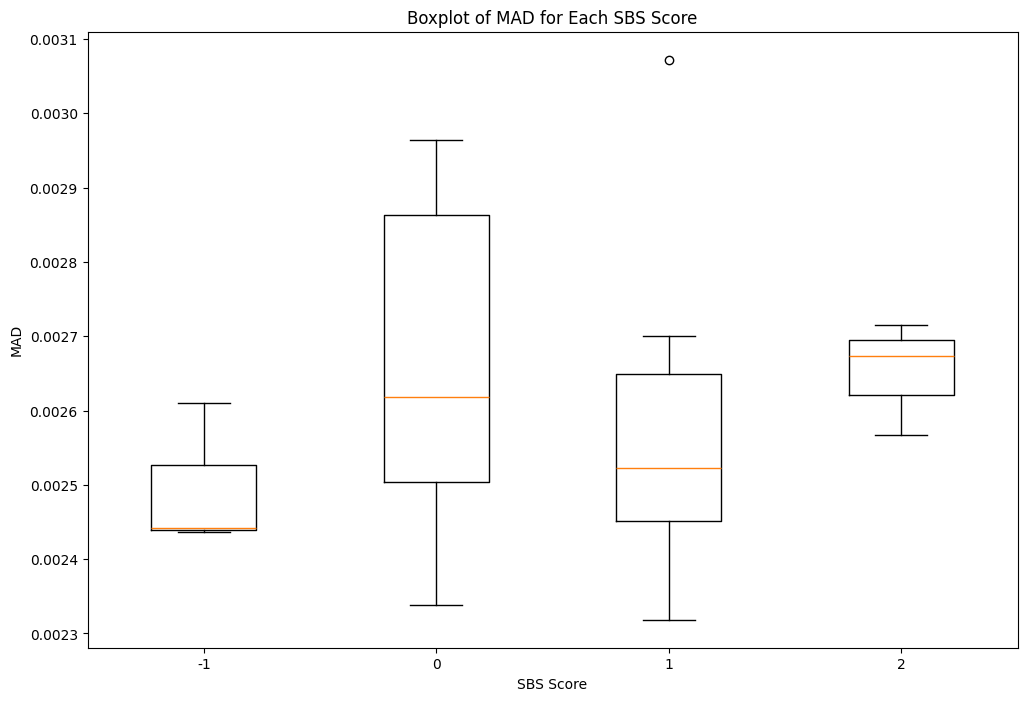

SBS Score: -1
Q1: 0.002439421885203925
Q2 (Median): 0.0024421550800777904
Q3: 0.0025263131537761685
90th Percentile: 0.0025768079979951956

SBS Score: 0
Q1: 0.0025031970479831465
Q2 (Median): 0.0026182002303823237
Q3: 0.0028625656092424717
90th Percentile: 0.002941243216830024

SBS Score: 1
Q1: 0.002451512439761578
Q2 (Median): 0.002523155372149183
Q3: 0.002648600122038026
90th Percentile: 0.0026919455171527753

SBS Score: 2
Q1: 0.00262054462865795
Q2 (Median): 0.002673873693162512
Q3: 0.0026947547099328184
90th Percentile: 0.0027072833199950023



In [183]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

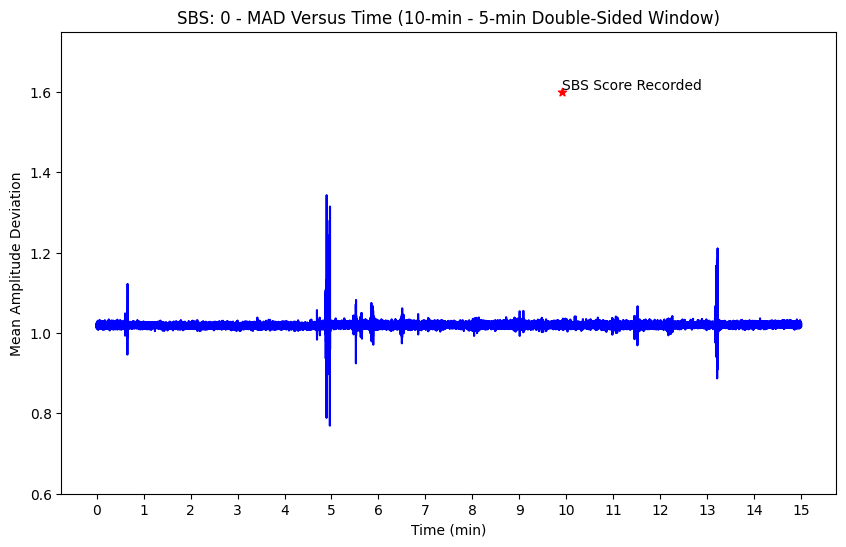

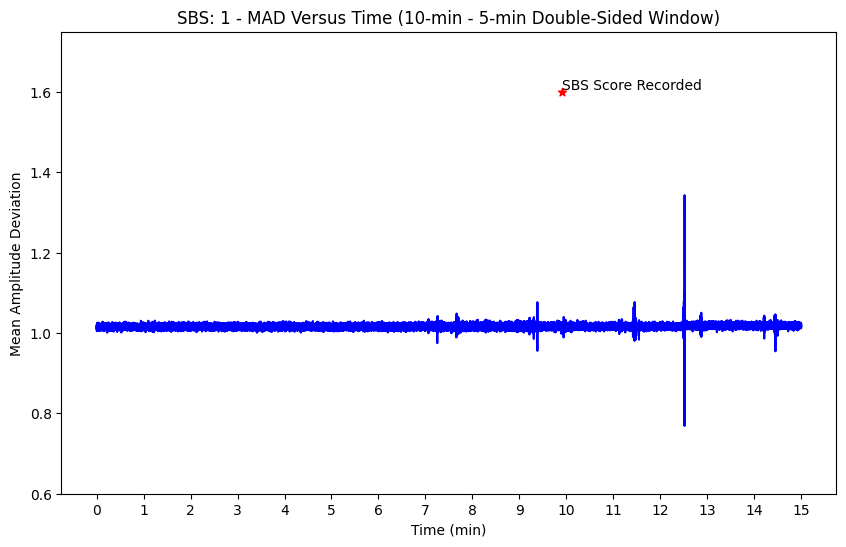

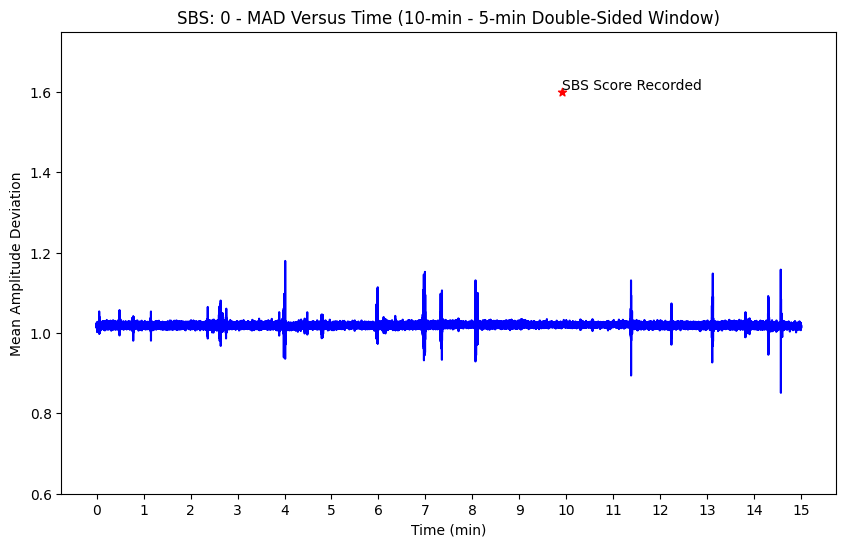

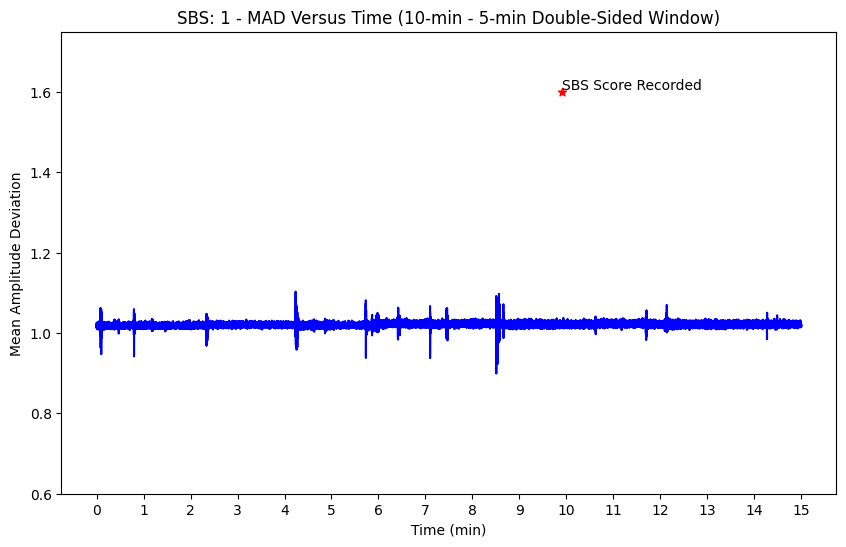

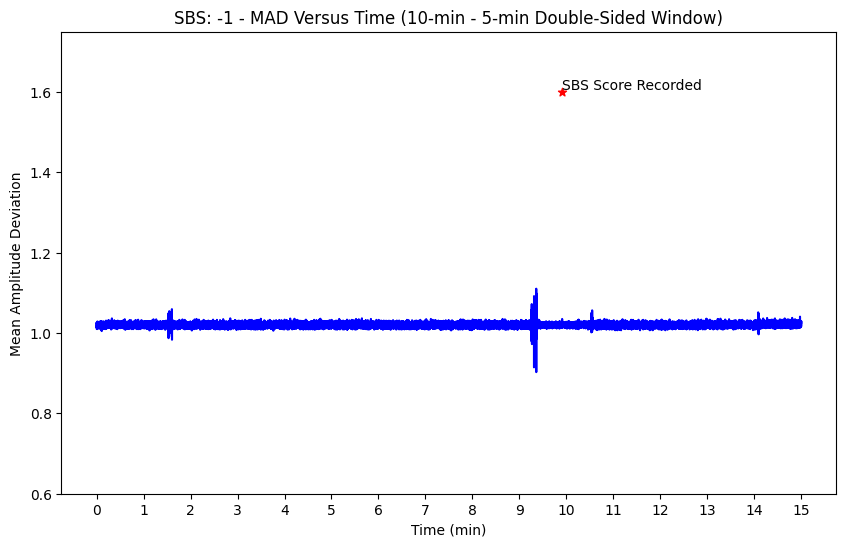

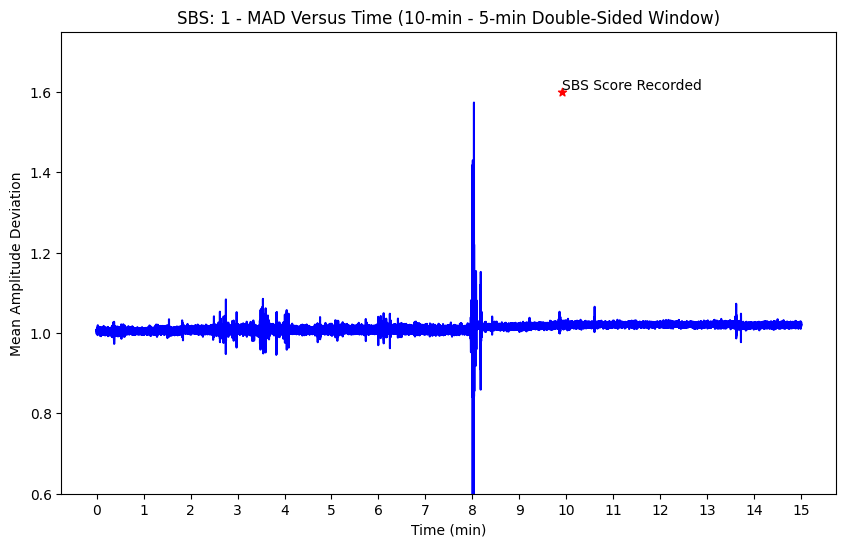

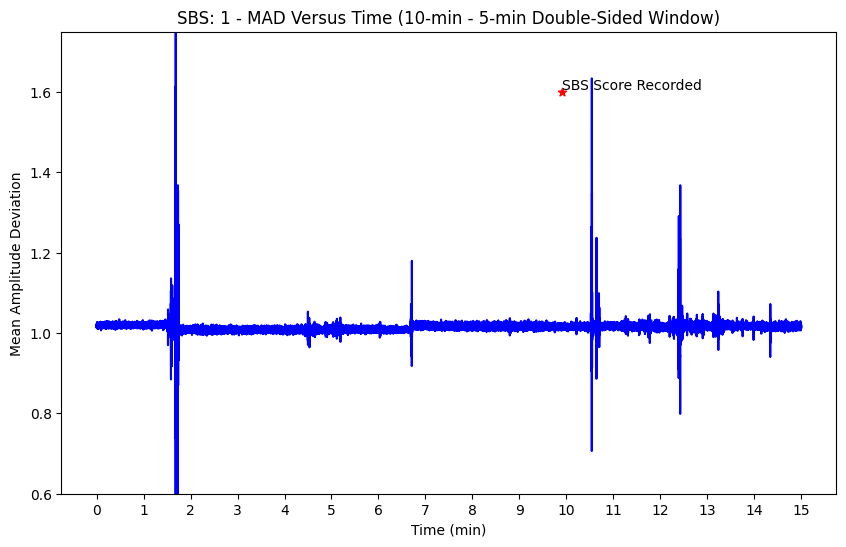

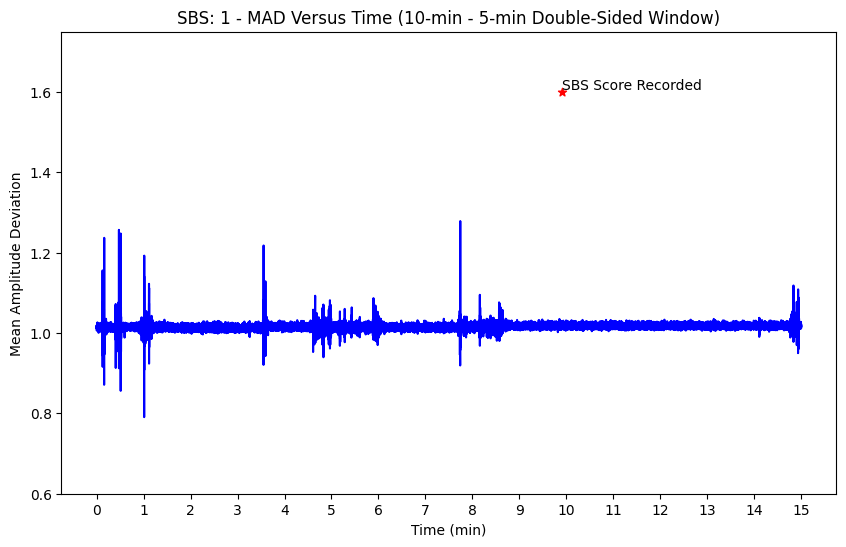

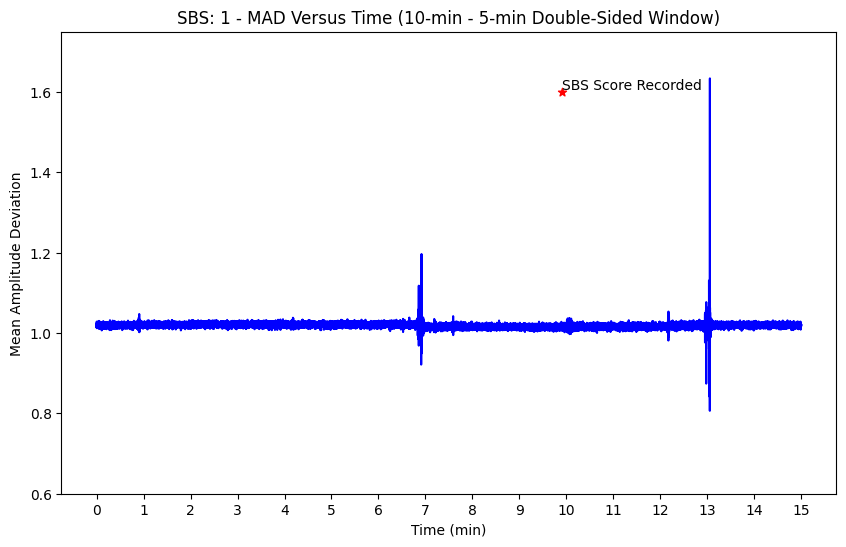

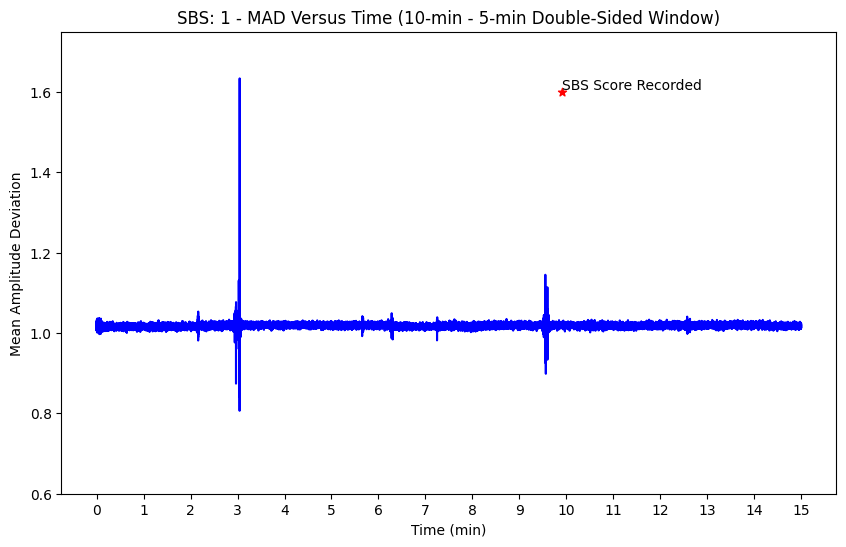

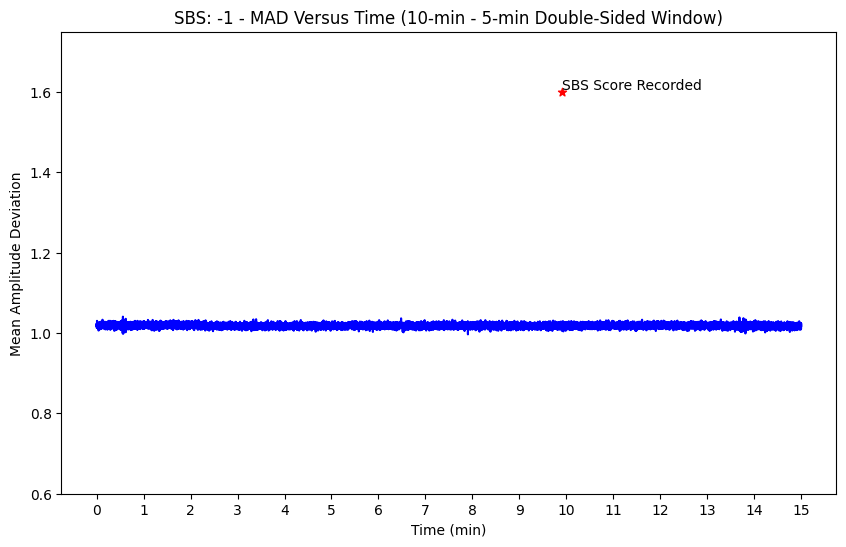

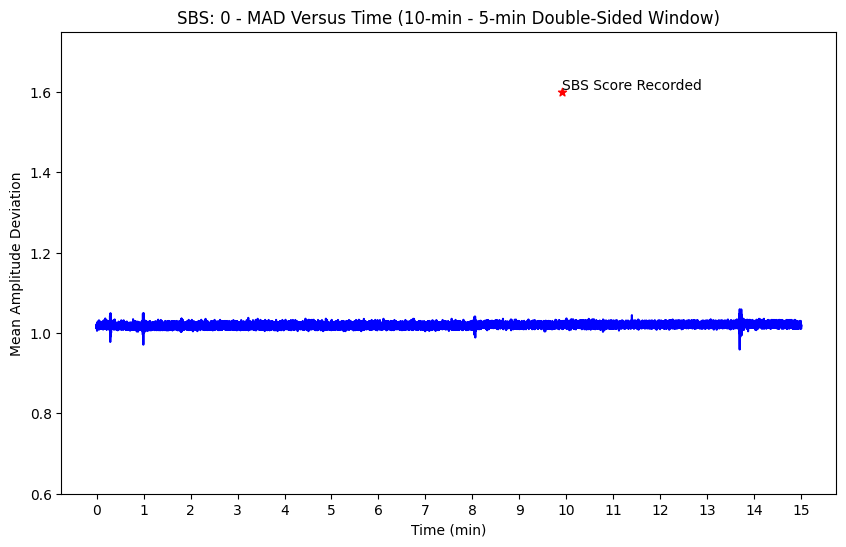

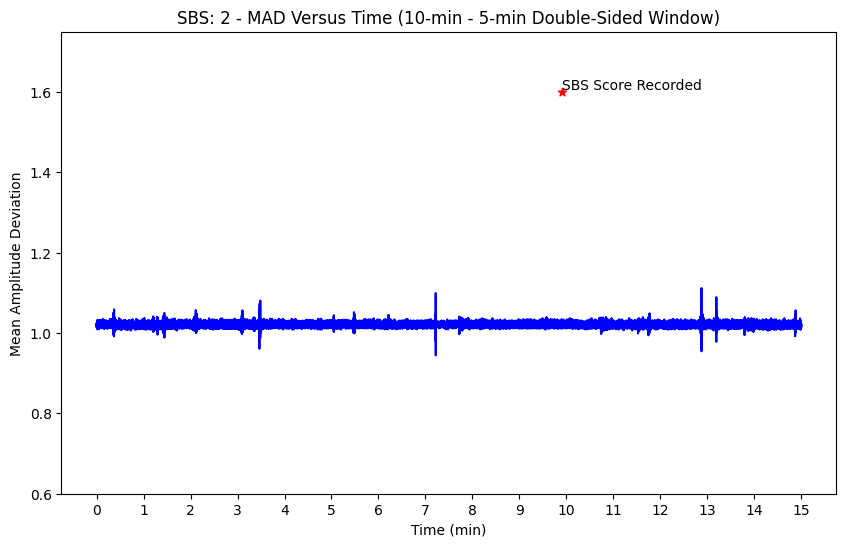

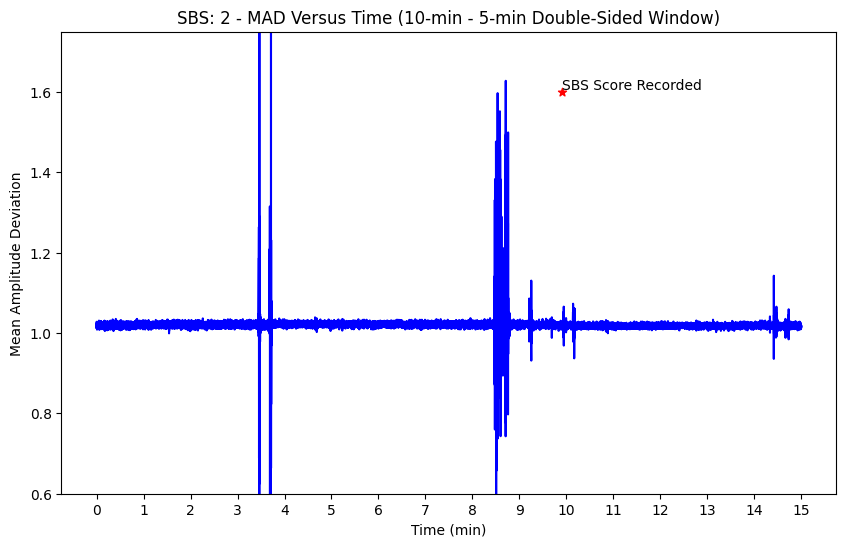

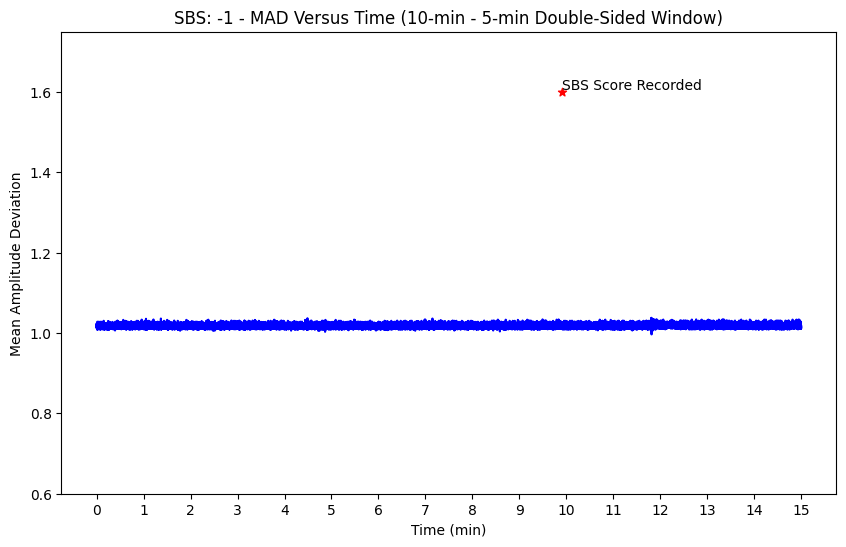

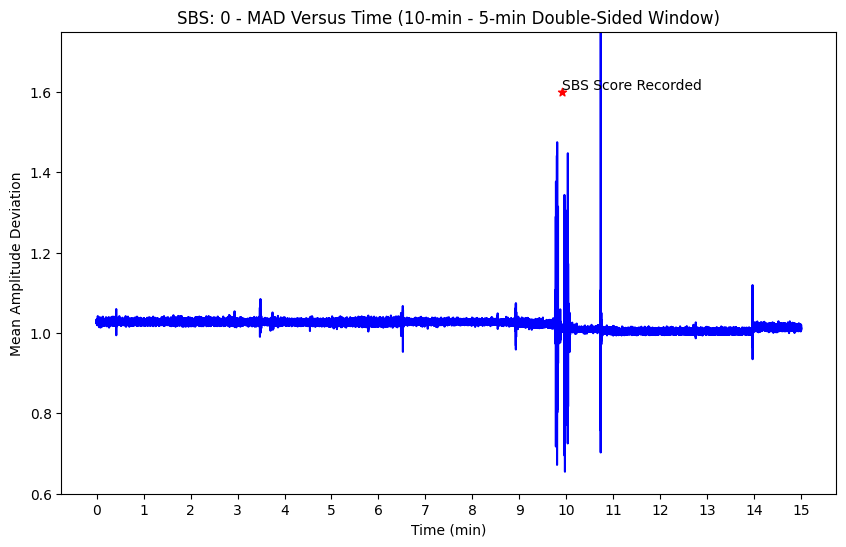

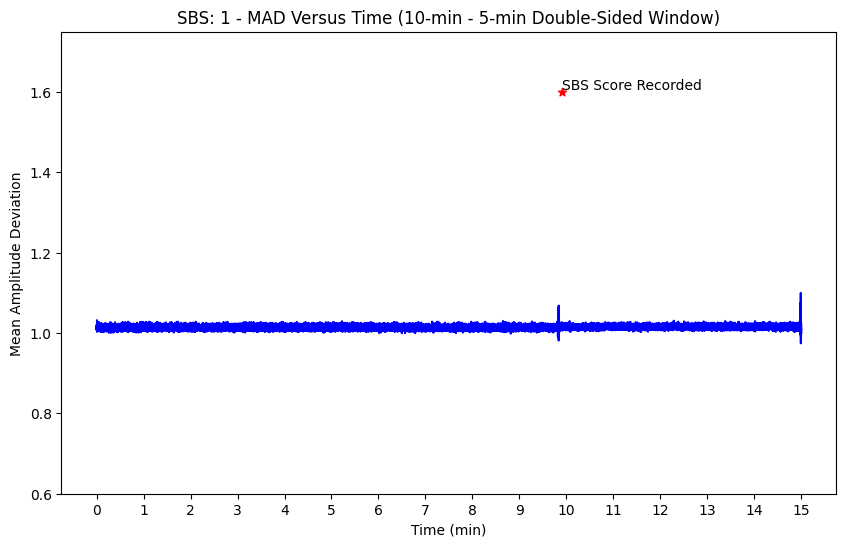

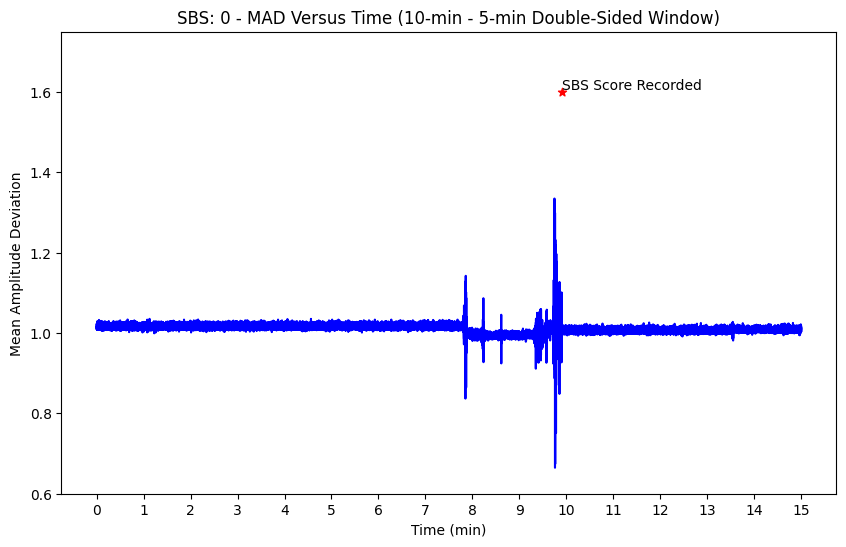

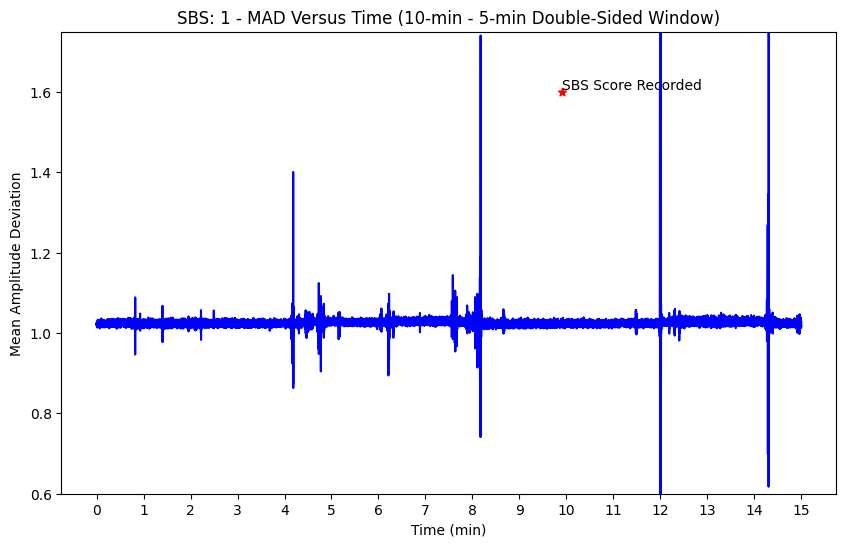

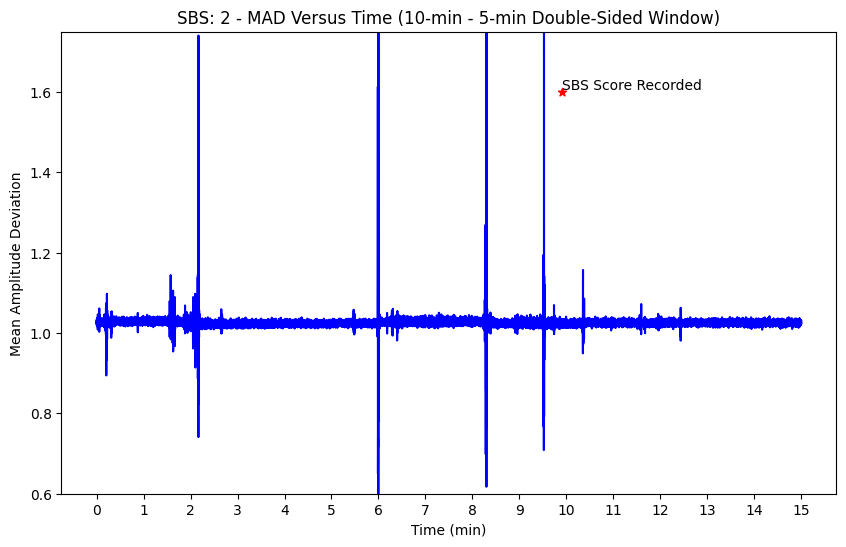

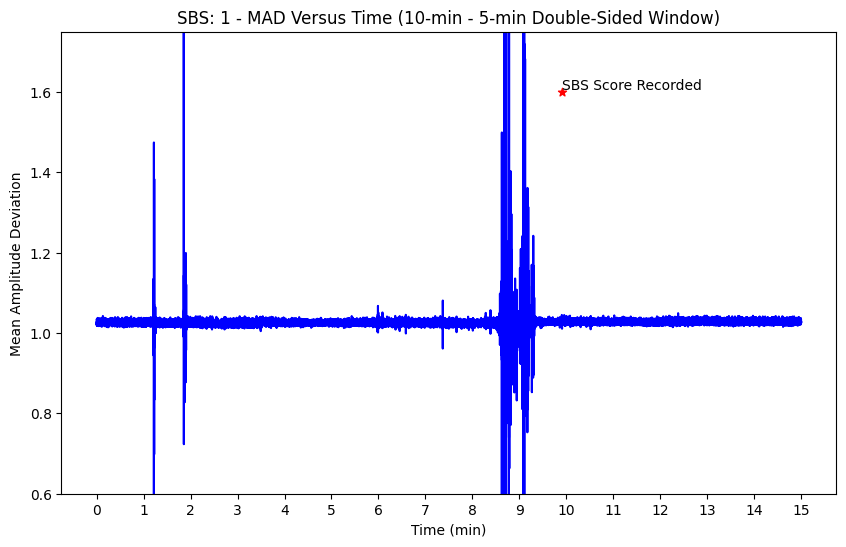

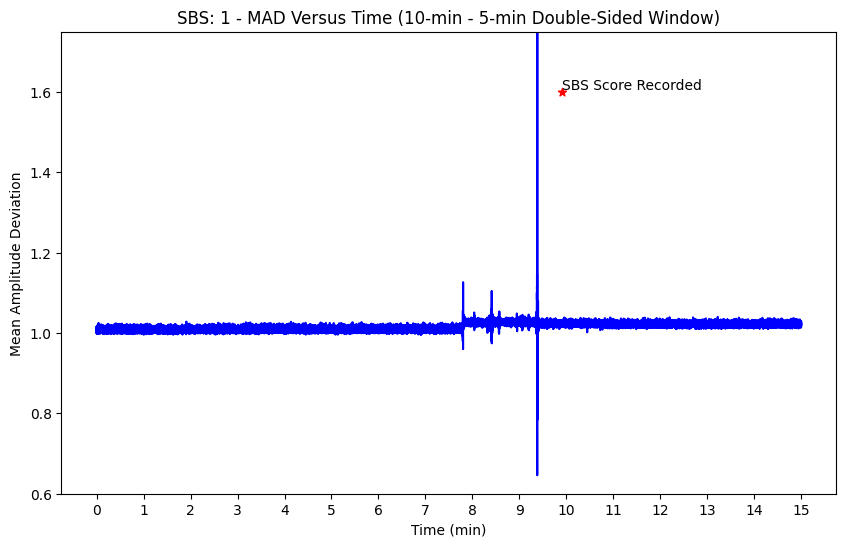

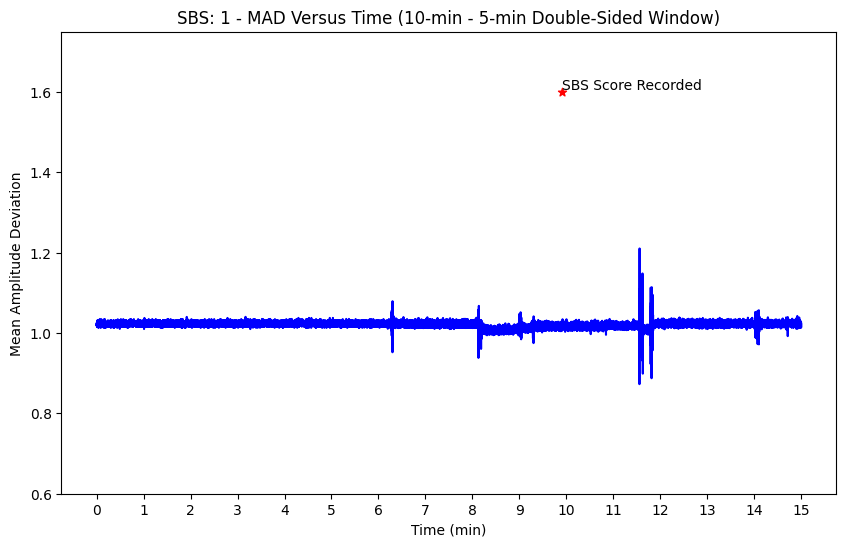

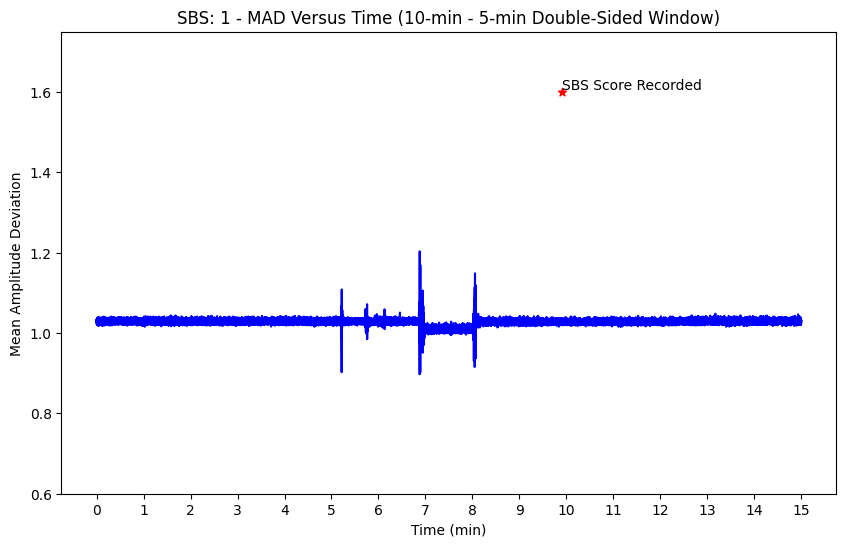

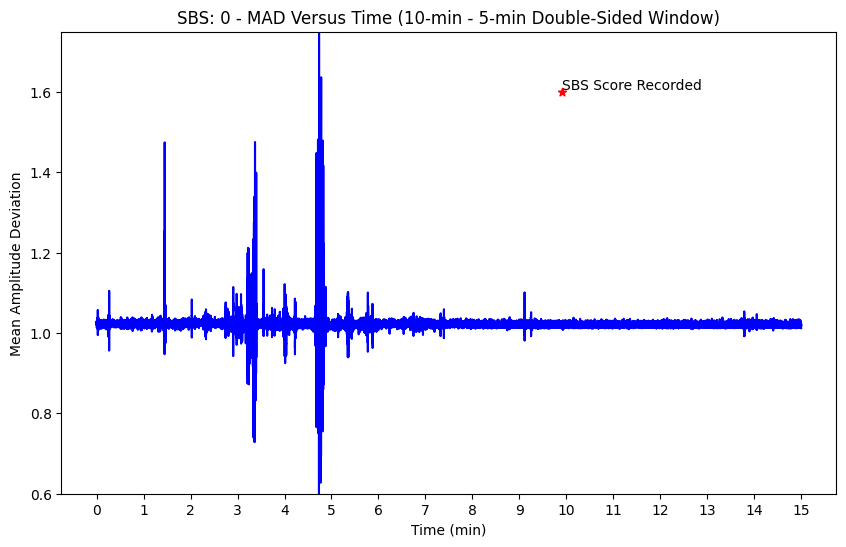

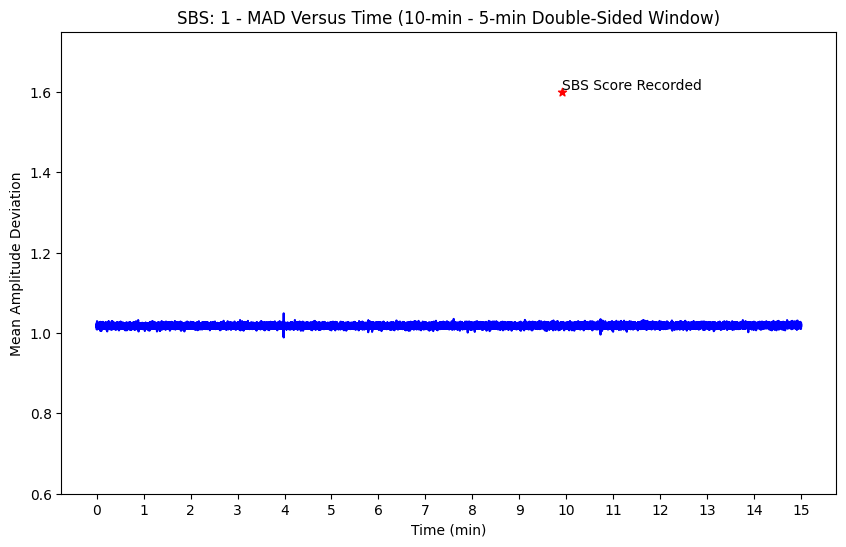

In [184]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 89899, num=89899)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 89899, num=16), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                                               '12', '13', '14', '15'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')
    
    tick_position = 99 * 8989.9 / 15
    plt.scatter(tick_position, 1.6, color='red', marker='*')
    plt.text(tick_position, 1.6, "SBS Score Recorded", fontsize=10, verticalalignment='bottom')

    # Title for the plot
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (10-min - 5-min Double-Sided Window)')
    
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\AnalysisResults\Patient9_10MIN_5MIN_DSW'
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    
    # Display the plot
    plt.show()
    
    count += 1

15 Min - 5 Minute Double-Sided Window

In [185]:
# Load 10-Min, 5-MIN Double-Sided Window Data
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')
filename = 'Patient9_15MIN_5MIN_DSW_AllSBS.mat'
x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]
print(len(x_mag))
print(len(SBS[0]))
print(len(x_mag[25]))

26
26
119899


In [186]:
# Calculate MAD
for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)

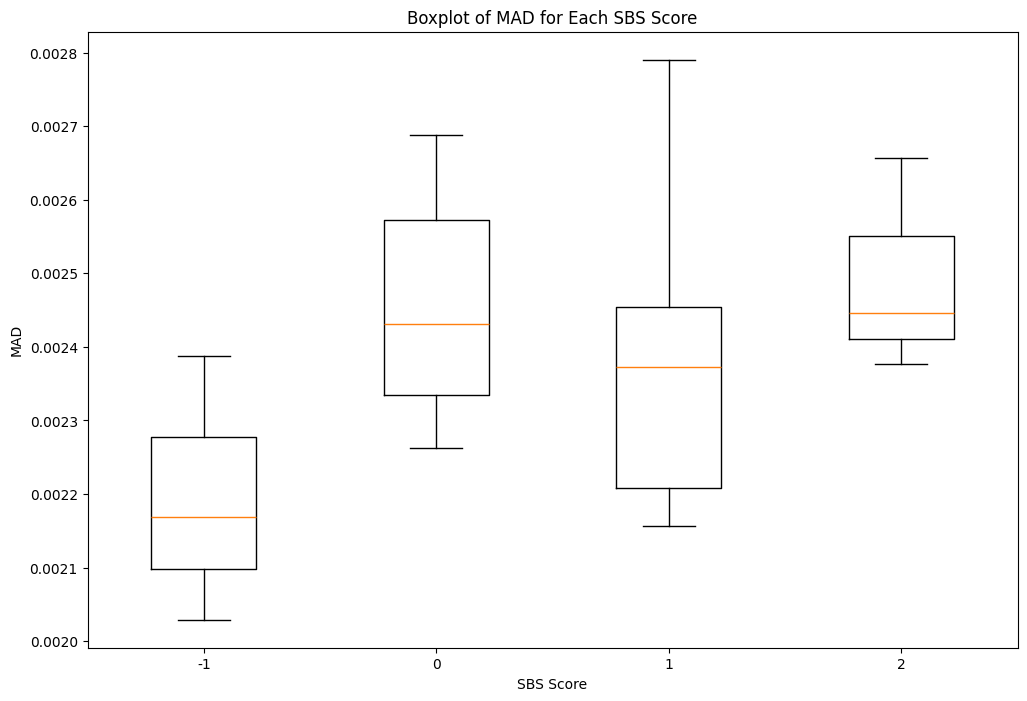

SBS Score: -1
Q1: 0.0020987022003804722
Q2 (Median): 0.0021681954855924768
Q3: 0.0022778168054610913
90th Percentile: 0.0023435895973822605

SBS Score: 0
Q1: 0.002334105756237577
Q2 (Median): 0.0024309828039607902
Q3: 0.0025726546577156313
90th Percentile: 0.0026394505658309956

SBS Score: 1
Q1: 0.002208585734447614
Q2 (Median): 0.002373199363052888
Q3: 0.002454519039168976
90th Percentile: 0.0025955873686843082

SBS Score: 2
Q1: 0.0024112022330886876
Q2 (Median): 0.0024463206847931663
Q3: 0.0025512554844620604
90th Percentile: 0.002614216364263397



In [187]:
# Output Boxplot for each SBS Score
sbs_mad_dict = {}
for sbs_value in SBS[0]:
    sbs_mad_dict[sbs_value] = []

sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

# Populate the dictionary with MAD values
for i, sbs_value in enumerate(SBS[0]):
    sbs_mad_dict[sbs_value].append(signal[i])

# Create a box and whisker plot for each SBS score
plt.figure(figsize=(12, 8))
plt.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'])
plt.xlabel('SBS Score')
plt.ylabel('MAD')
plt.title('Boxplot of MAD for Each SBS Score')
plt.show()     

quartiles = {}
for sbs_value, mad_list in sbs_mad_dict.items():
    quartiles[sbs_value] = {
        'Q1': np.percentile(mad_list, 25),
        'Q2': np.percentile(mad_list, 50),
        'Q3': np.percentile(mad_list, 75),
        '90th Percentile': np.percentile(mad_list, 90)
    }

# Print quartiles and 90th percentile
for sbs_value, values in quartiles.items():
    print(f"SBS Score: {sbs_value}")
    print(f"Q1: {values['Q1']}")
    print(f"Q2 (Median): {values['Q2']}")
    print(f"Q3: {values['Q3']}")
    print(f"90th Percentile: {values['90th Percentile']}")
    print()

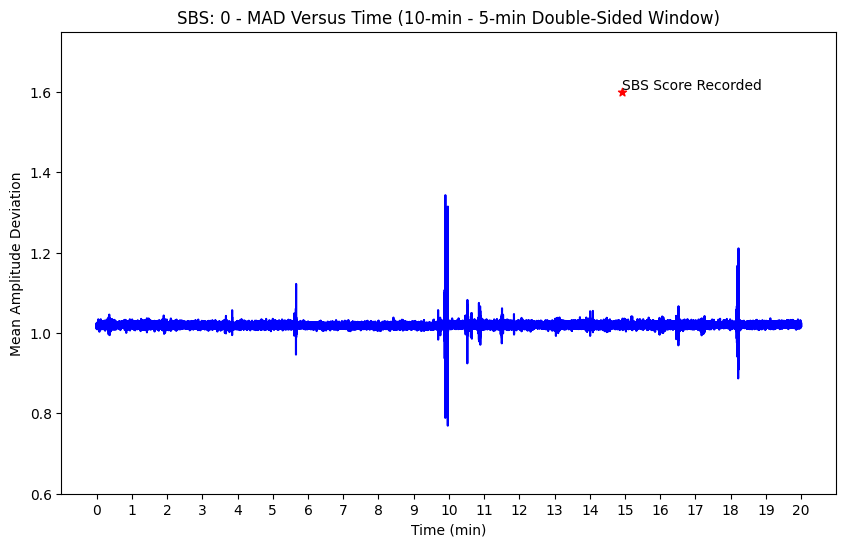

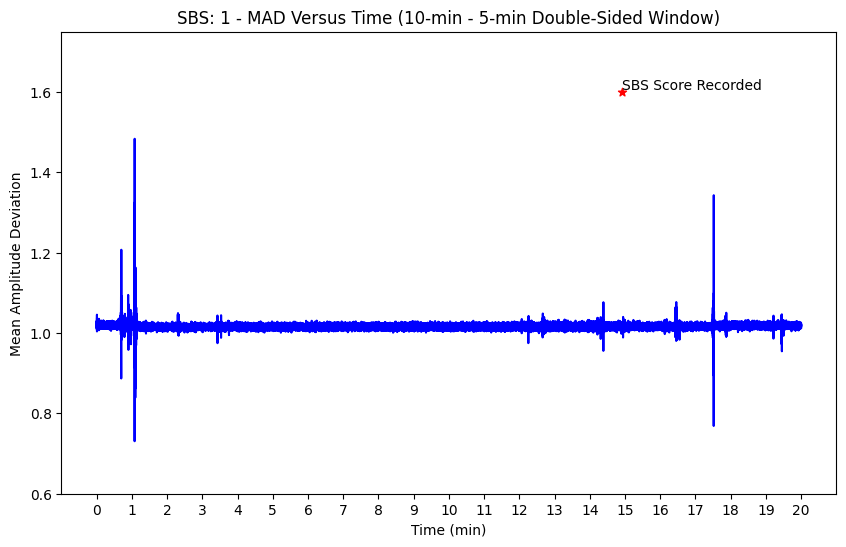

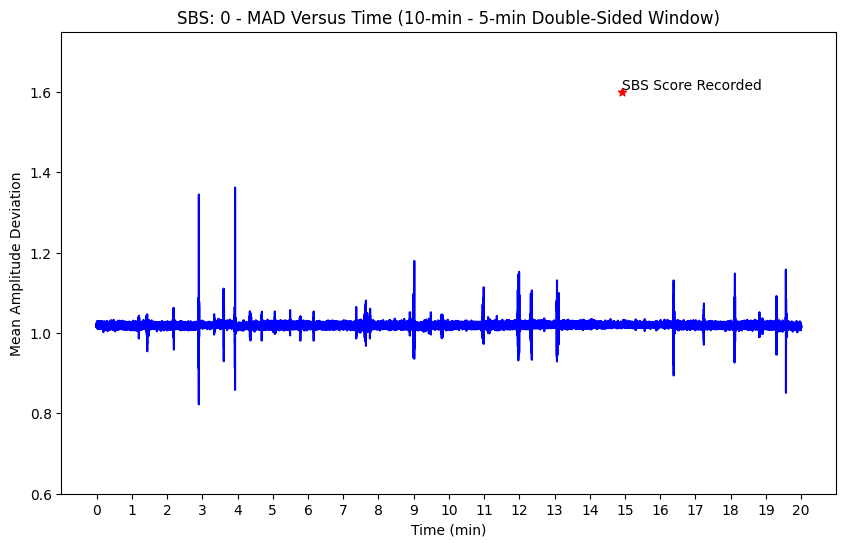

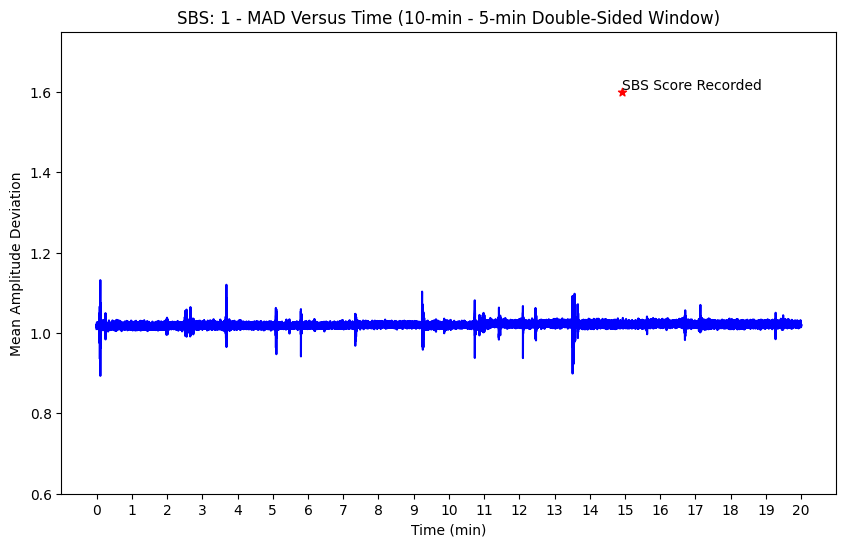

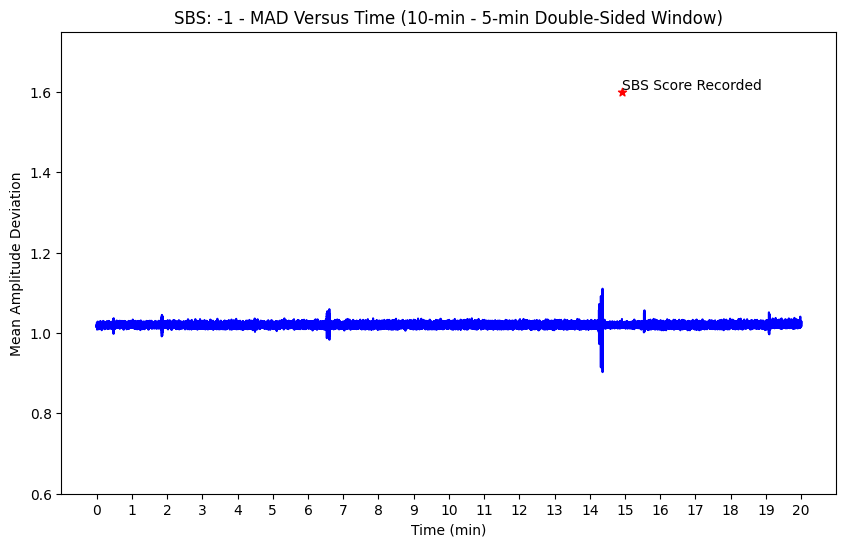

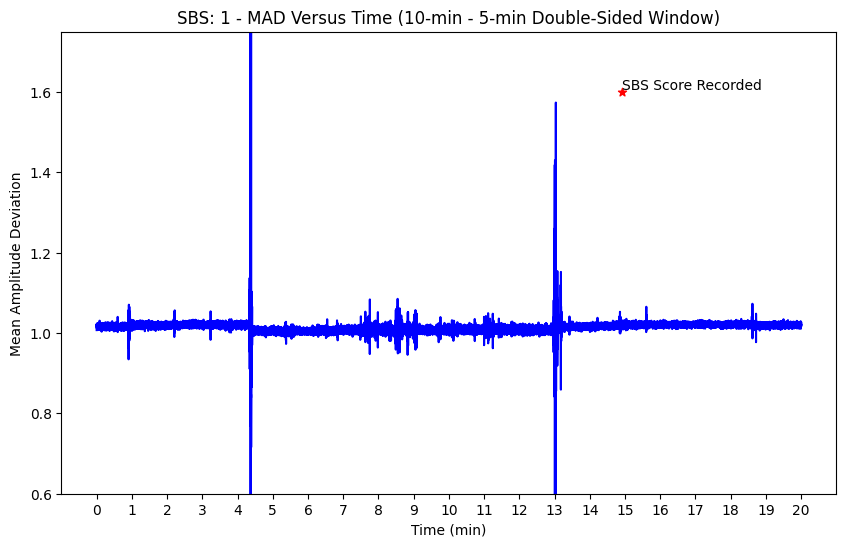

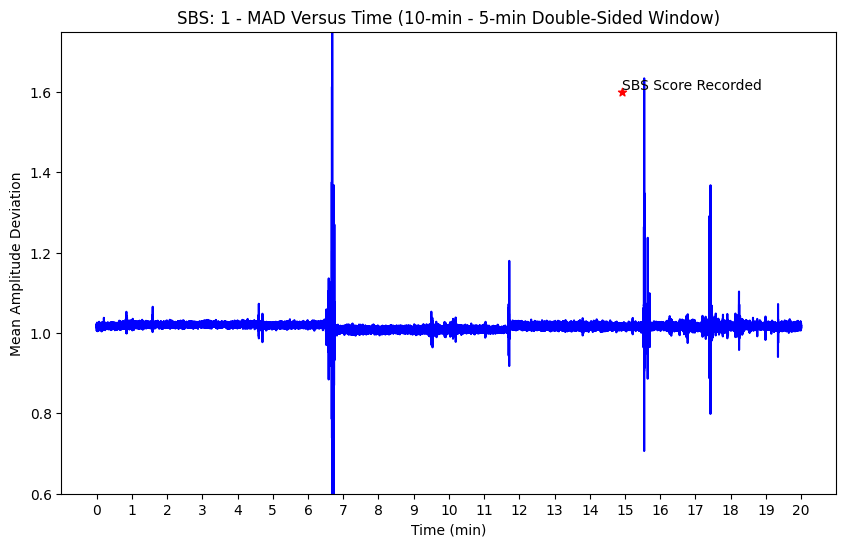

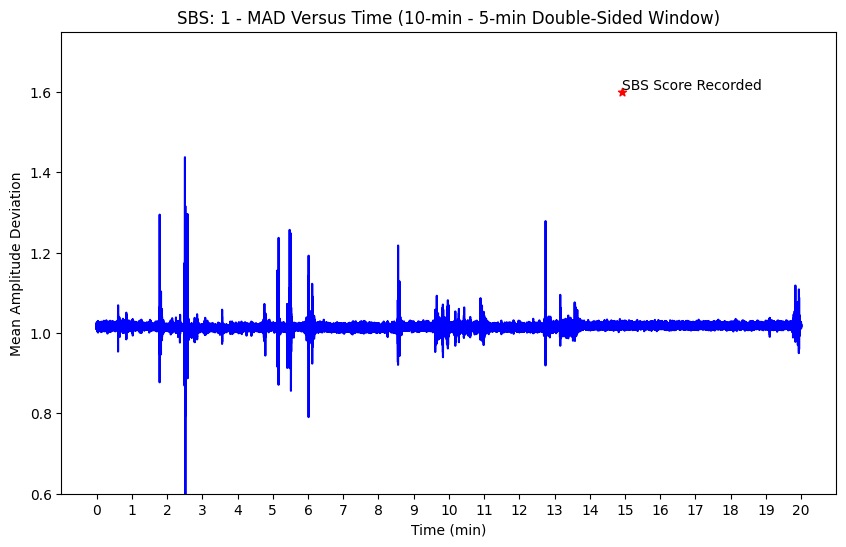

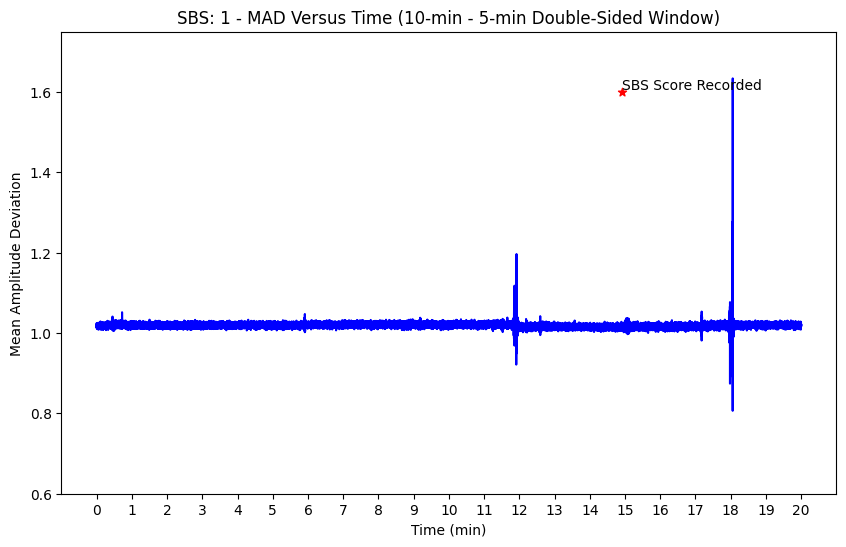

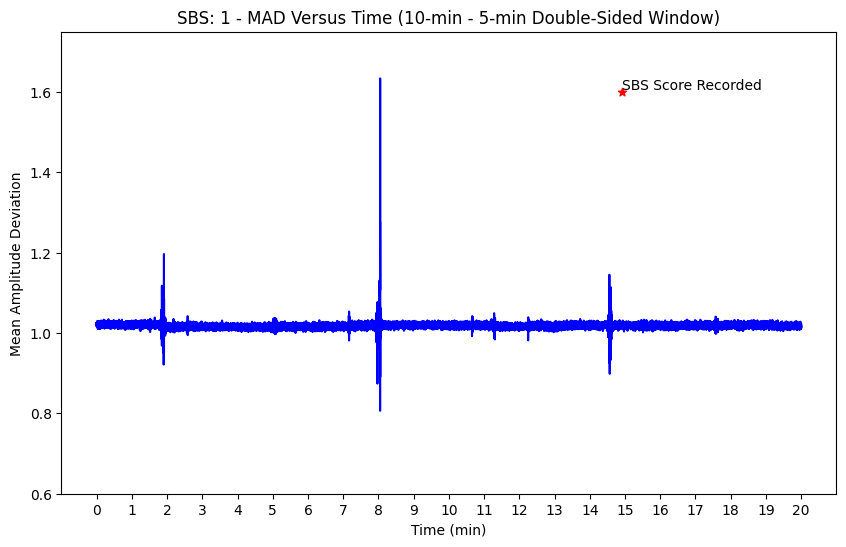

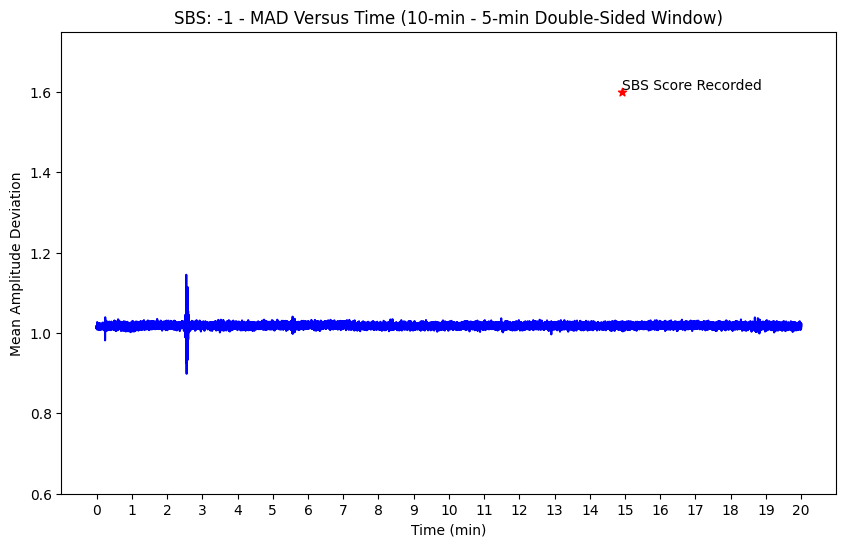

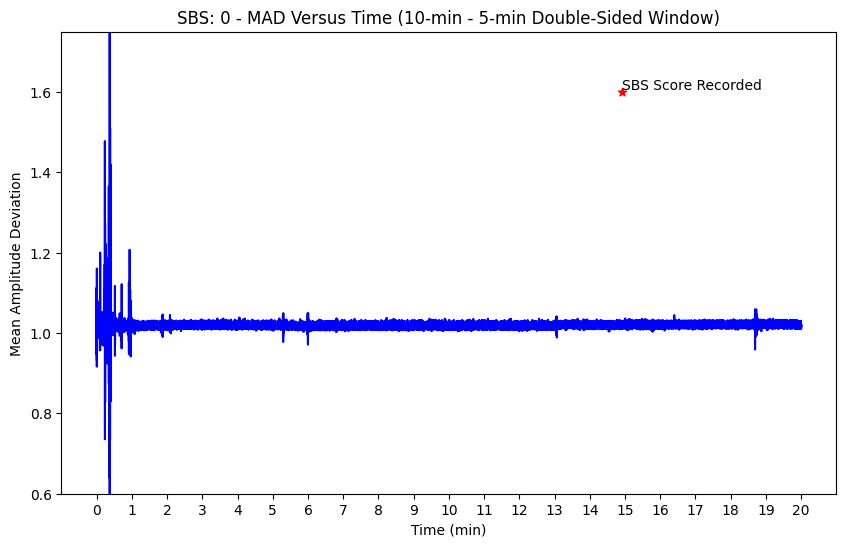

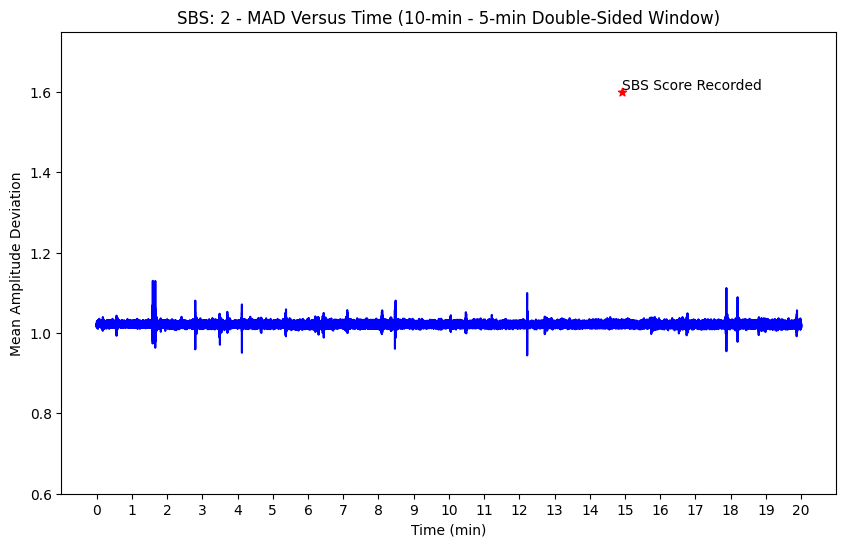

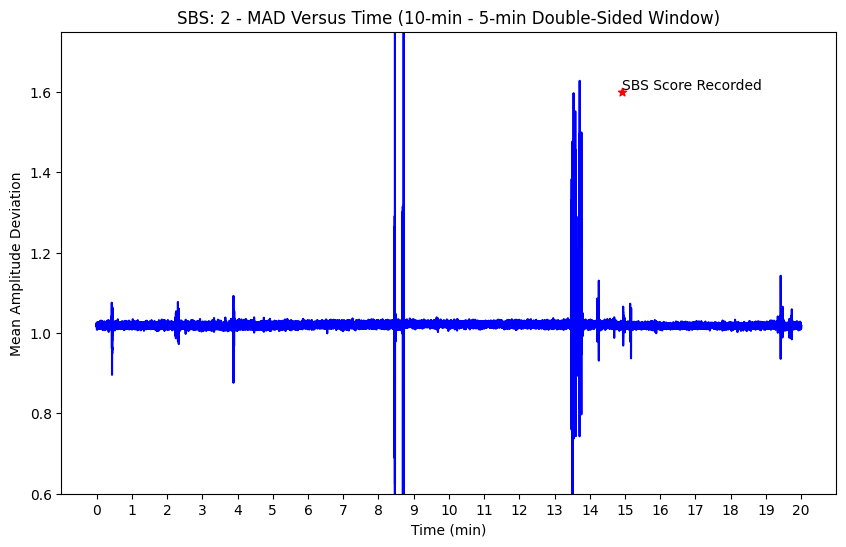

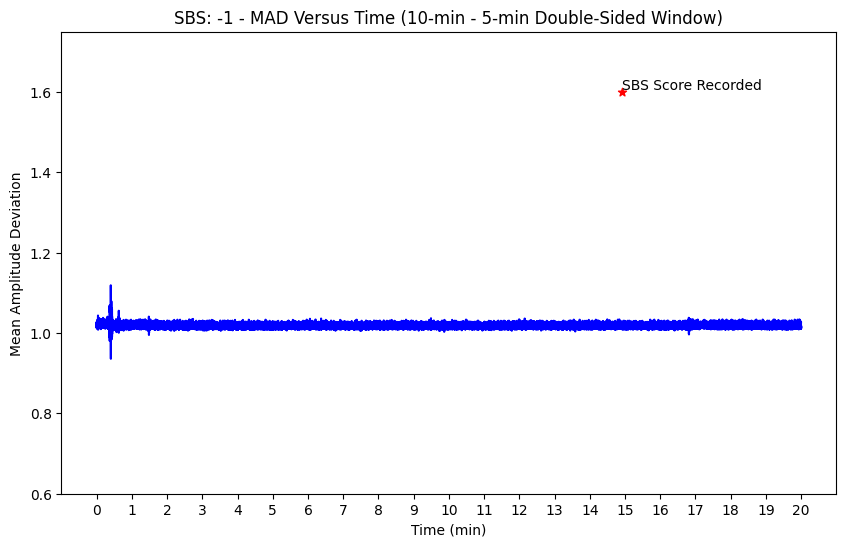

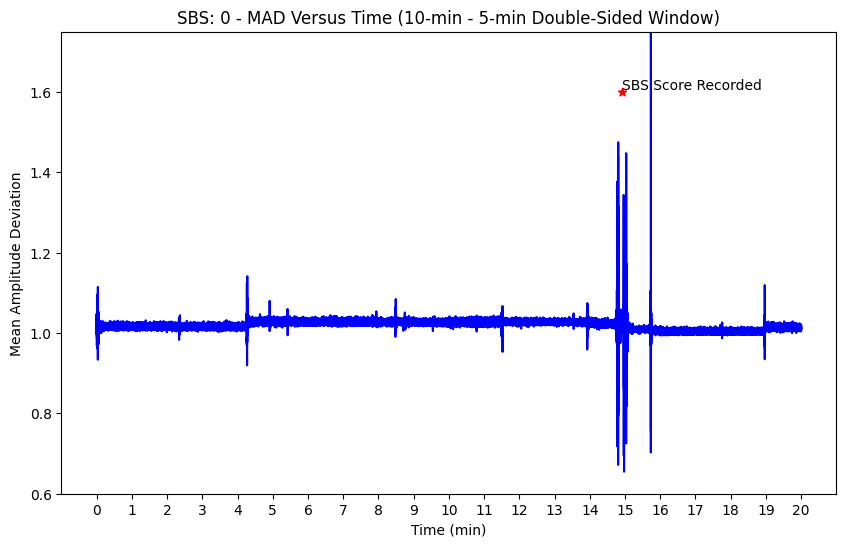

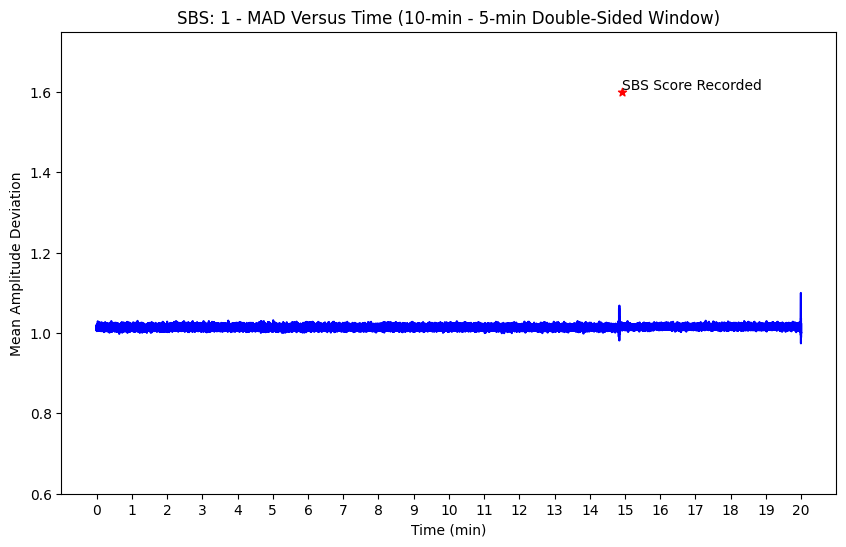

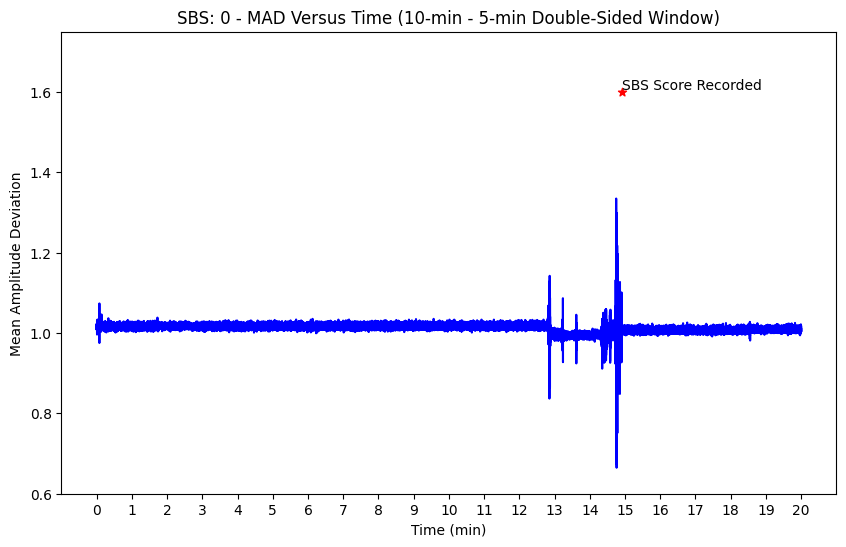

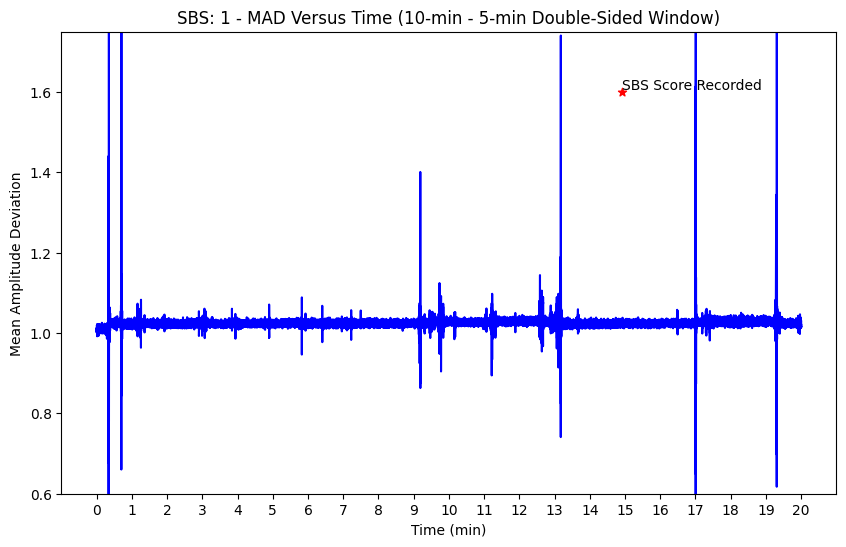

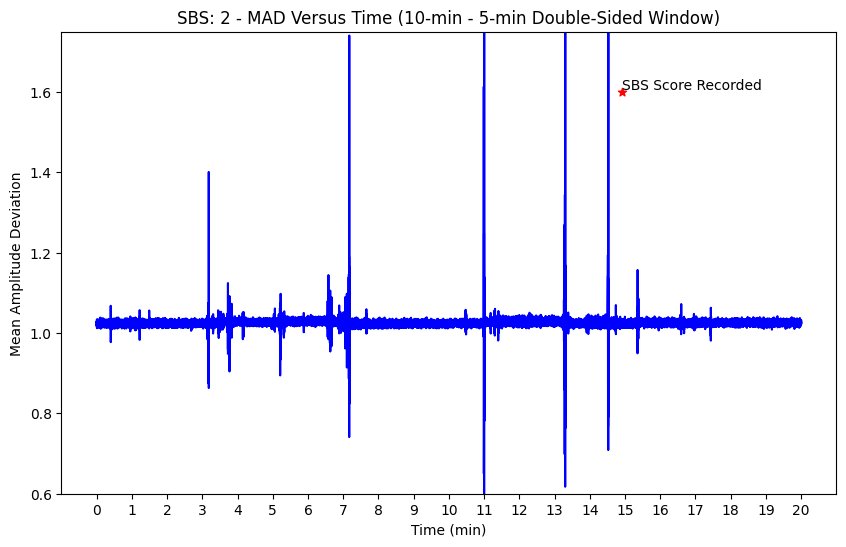

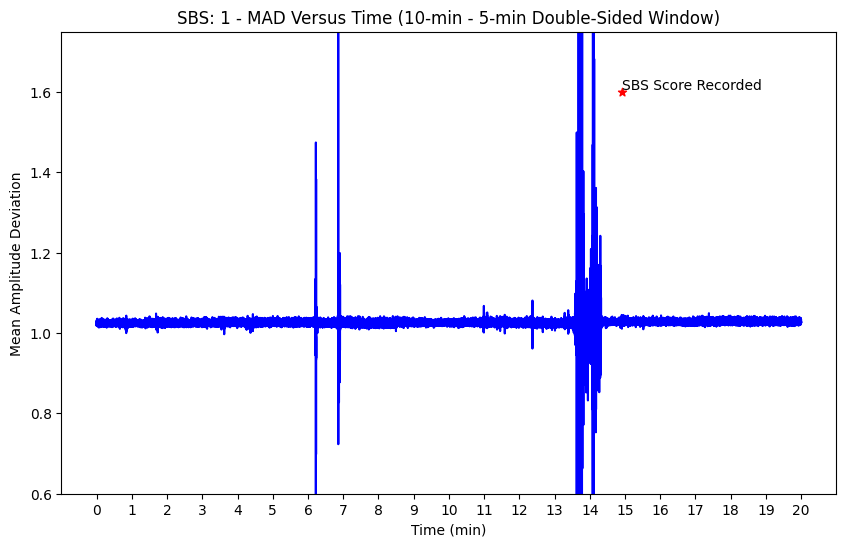

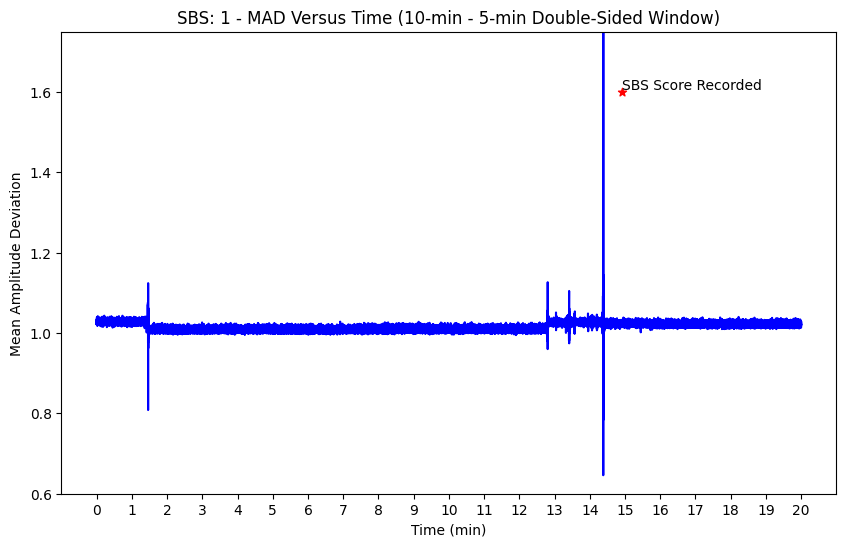

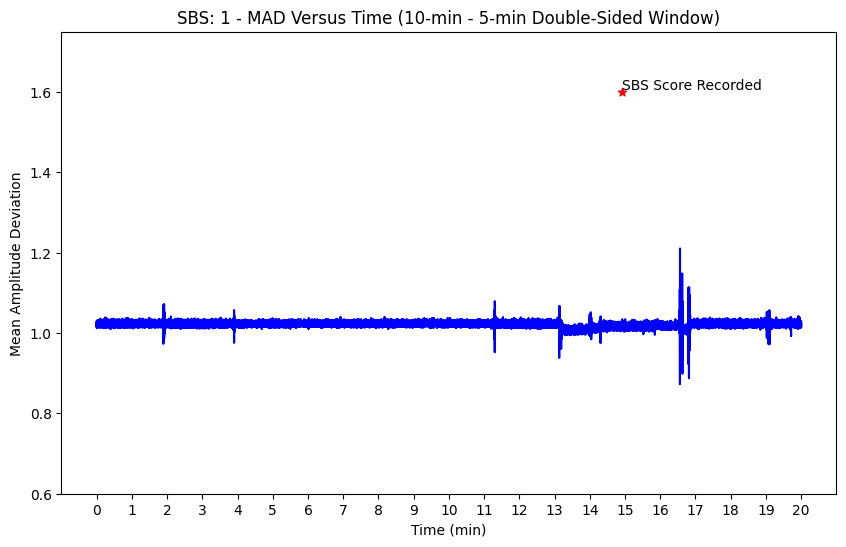

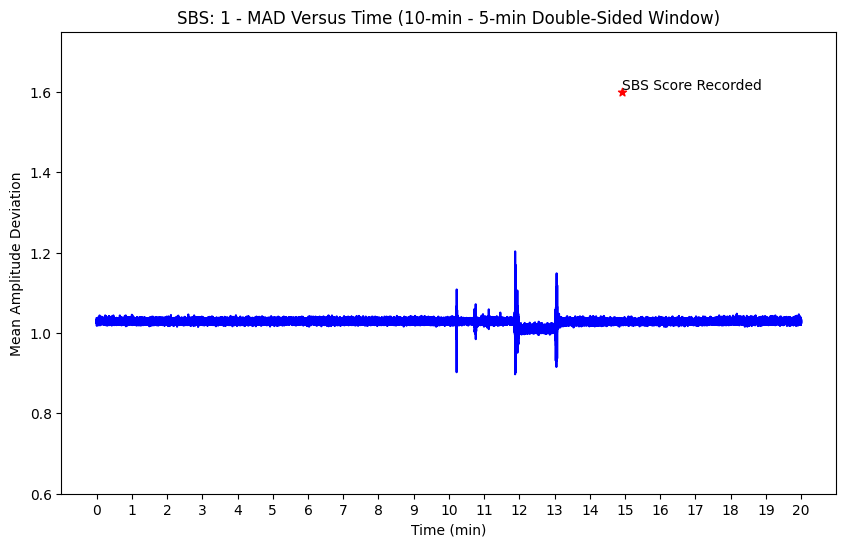

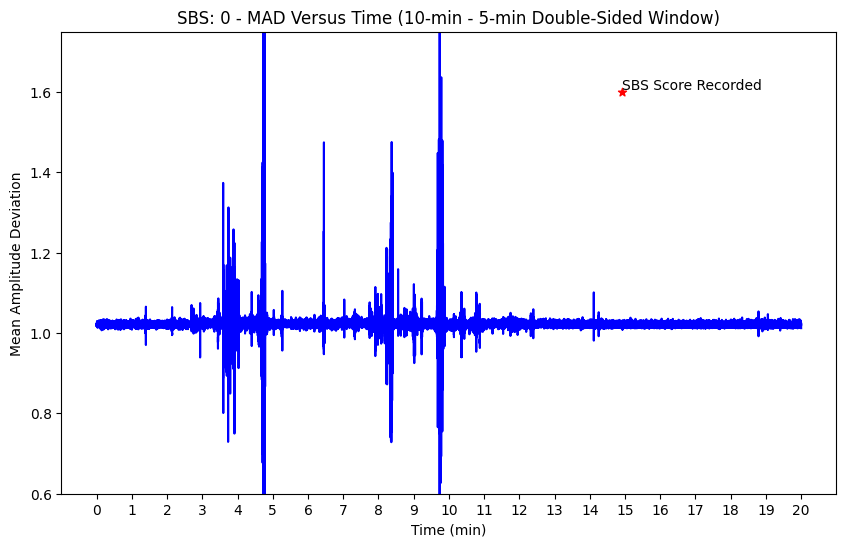

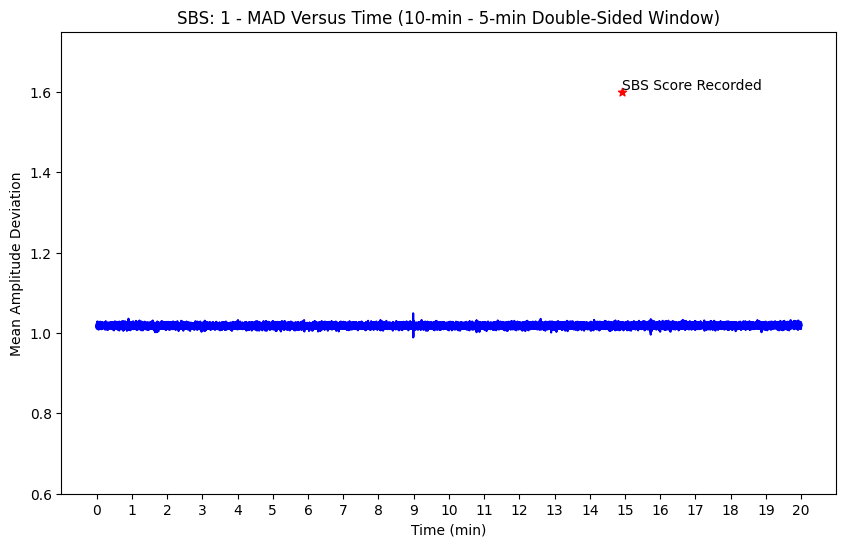

In [188]:
# Print Graph per SBS
count = 0
for sbs_value in SBS[0]:
    # Plotting
    time = np.linspace(0, 119899, num=119899)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # Plot mean against time
    plt.plot(time, x_mag[count], color='blue')
    
    plt.ylim(0.6, 1.75)
    plt.xticks(np.linspace(0, 119899, num=21), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                                               '12', '13', '14', '15', '16', '17', '18', '19', '20'])

    # Labeling the axes
    plt.xlabel('Time (min)')
    plt.ylabel('Mean Amplitude Deviation')
    
    tick_position = 149 * 11989.9 / 20
    plt.scatter(tick_position, 1.6, color='red', marker='*')
    plt.text(tick_position, 1.6, "SBS Score Recorded", fontsize=10, verticalalignment='bottom')

    # Title for the plot
    plt.title(f'SBS: {sbs_value} - MAD Versus Time (10-min - 5-min Double-Sided Window)')
    
    folder_path = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\AnalysisResults\Patient9_15MIN_5MIN_DSW'
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    
    # Display the plot
    plt.show()
    
    count += 1